# Install dependencies on Ubuntu Linux
Users might need to install some dependencies on their system to be able to install all required R packages.
We provide here the list of dependencies needed on the Ubuntu Linux system.
Run the following command on Linux Shell to install the dependencies:

On some systems, the `preprocessCore` R package might encounter error with multiple threading.
If that case happens, we advise to install/reinstall the package with threading disable:

In [1]:
BiocManager::install(c("preprocessCore", "oligo"), configure.args="--disable-threading", force = T, update = F)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'preprocessCore', 'oligo'



## **Installation**

In [2]:
# Install from CRAN
# install.packages("RCPA")

# Install from GitHub (developer's version)
install.packages("remotes")
remotes::install_github('tinnlab/RCPA', upgrade = F, force = T)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




✔  checking for file ‘/tmp/Rtmpw11pD0/remotes45ab64827b73/tinnlab-RCPA-dc02e91/DESCRIPTION’
─  preparing ‘RCPA’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘RCPA_0.1.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## **Load the required libraries**

In [3]:
# Unload RCPA if being used
unloadNamespace("RCPA")
# Load the libraries:
library(RCPA)
library(SummarizedExperiment)
library(ggplot2)

Loading required package: tidyr

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks,

## **Basic Protocol 1: PROCESSING AFFYMETRIX MICROARRAY**

In [4]:
# Create a local directory to save the data:
userPath <- tempdir() # or replace tempdir() with user-defined directory path
downloadPath <- file.path(userPath, "GSE5281")
if(!dir.exists(downloadPath)) dir.create(downloadPath)

# Download the data
affyDataset <- RCPA::downloadGEO(GEOID = "GSE5281", 
                                platform = "GPL570", 
                                protocol = "affymetrix", 
                                destDir = downloadPath)

# Display affyDataset
affyDataset

Found 1 file(s)

GSE5281_series_matrix.txt.gz

Welcome to oligoClasses version 1.64.0


Attaching package: ‘Biostrings’


The following object is masked from ‘package:base’:

    strsplit



Welcome to oligo version 1.66.0



Attaching package: ‘oligo’


The following object is masked from ‘package:dplyr’:

    summarize


Loading required package: pd.hg.u133.plus.2

Loading required package: RSQLite

Loading required package: DBI

Platform design info loaded.



Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119615.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119616.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119617.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119618.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119619.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119620.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119621.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119622.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119623.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119624.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119625.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119626.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119627.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119628.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119629.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119630.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119631.CEL.gz
Reading in : /tmp/Rtmpw11pD0/GSE5281/GSM119632.CEL.gz
Reading in : /tmp/Rtmpw11pD0

class: SummarizedExperiment 
dim: 54675 161 
metadata(0):
assays(1): ''
rownames(54675): 1007_s_at 1053_at ... AFFX-r2-P1-cre-3_at
  AFFX-r2-P1-cre-5_at
rowData names(0):
colnames(161): GSM119615 GSM119616 ... GSM238955 GSM238963
colData names(70): title geo_accession ... sample.amount.ch1 sex.ch1

The `affyDataset` object is a `SummarizedExperiment` object, therefore, we can use `assay()` and `colData()` functions to access to the data stored in it: 

In [5]:
# access expression data
affyExprs <- SummarizedExperiment::assay(affyDataset)

# Display affyExprs
head(affyExprs, c(5, 6))

GSM119615 GSM119616 GSM119617 GSM119618 GSM119619 GSM119620
1007_s_at 3.043234  3.055157  3.144277  3.150378  3.084336  2.989966 
1053_at   1.698974  1.645050  1.618537  1.589216  1.676278  1.581733 
117_at    1.795751  1.770719  1.805597  1.995794  1.688068  1.961556 
121_at    2.553174  2.668456  2.801450  2.784216  2.588638  2.692849 
1255_g_at 1.626691  1.940055  1.663162  1.483875  2.354096  1.671216

In [6]:
# Access to sample information
affySampleInfo <- SummarizedExperiment::colData(affyDataset)

# Display affySampleInfo
as.data.frame(head(affySampleInfo[, c("title","characteristics_ch1.4","characteristics_ch1.8")]))

title        characteristics_ch1.4            characteristics_ch1.8 
GSM119615 EC control 1 Organ Region: Entorhinal Cortex  Disease State: normal 
GSM119616 EC control 2 Organ Region: Entorhinal Cortex  Disease State: normal 
GSM119617 EC control 3 Organ Region: Entorhinal Cortex  Disease State: normal 
GSM119618 EC control 4 Organ Region: Entorhinal Cortex  Disease State: normal 
GSM119619 EC control 5 Organ Region: Entorhinal Cortex  Disease State: normal 
GSM119620 EC control 6 Organ Region: Entorhinal Cortex  Disease State: normal

## **Support Prococol 1: PROCESSING AGILENT MICROARRAY**

In [7]:
# Create a local directory to save the downloaded data:
userPath <- tempdir()    # or user-defined directory path
downloadPath <- file.path(userPath, "GSE61196")
if(!dir.exists(downloadPath)) dir.create(downloadPath)
# Download the data
agilDataset <- RCPA::downloadGEO(GEOID = "GSE61196", platform ="GPL4133", protocol = "agilent", destDir = downloadPath, greenOnly = FALSE)

# Display agilDataset
agilDataset

Found 1 file(s)

GSE61196_series_matrix.txt.gz



Read /tmp/Rtmpw11pD0/GSE61196/GSM1499379.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499380.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499381.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499382.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499383.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499384.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499385.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499386.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499387.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499388.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499389.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499390.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499391.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499392.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499393.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499394.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499395.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499396.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499397.TXT.gz 
Read /tmp/Rtmpw11pD0/GSE61196/GSM1499398.TXT.gz 
Read /tmp/Rtmpw11pD0

class: SummarizedExperiment 
dim: 45015 21 
metadata(0):
assays(1): ''
rownames(45015): GE_BrightCorner DarkCorner ... GE_BrightCorner
  GE_BrightCorner
rowData names(0):
colnames(21): GSM1499379 GSM1499380 ... GSM1499398 GSM1499399
colData names(48): title geo_accession ... tissue.ch1 tissue.ch2

In [8]:

# Access expression data
agilExprs <- SummarizedExperiment::assay(agilDataset)
# Display agilExprs
agilExprs[9:14, 1:6]

GSM1499379 GSM1499380 GSM1499381 GSM1499382 GSM1499383 GSM1499384
DarkCorner    3.765860   4.191198   4.543230   4.663244   5.094978   3.860652 
DarkCorner    3.962802   4.467307   4.200014   4.417445   4.574157   4.362014 
DarkCorner    4.258405   4.216067   3.825804   3.993204   4.787838   4.295524 
A_24_P66027   7.853252   8.038021   7.858425   7.573315   7.814866   7.882954 
A_32_P77178   4.835717   4.678353   5.217154   5.307724   5.299094   4.591740 
A_23_P212522 11.136671  11.407050  11.531872  11.202280  11.476940  10.980672

In [9]:
# Access sample information
agilSampleInfo <- SummarizedExperiment::colData(agilDataset)
# Display agilSampleInfo
as.data.frame(agilSampleInfo[9:14, c("geo_accession", "characteristics_ch2.1", "tissue.ch2")])

geo_accession characteristics_ch2.1  tissue.ch2 
GSM1499387 GSM1499387    disease state: healthy RPE/chodoid
GSM1499388 GSM1499388    disease state: healthy RPE/chodoid
GSM1499389 GSM1499389    disease state: healthy RPE/chodoid
GSM1499390 GSM1499390    disease state: healthy RPE/chodoid
GSM1499391 GSM1499391    disease state: healthy RPE/chodoid
GSM1499392 GSM1499392    disease state: healthy RPE/chodoid

## **Support Protocol 2: PROCESSING RNA SEQUENCING (RNA-SEQ)**

First, we will download the raw count data from GEO:

In [10]:
 # Create a temporary download path or user-defined directory
userPath <- tempdir()  # or user-defined directory path
if(!dir.exists(userPath)) dir.create(userPath)
# Download the data
GEOquery::getGEOSuppFiles(GEO = "GSE153873", fetch_files = TRUE, baseDir = userPath)

# Specify the path to the downloaded read count file
countsFile <- file.path(userPath, "GSE153873", "GSE153873_summary_count.star.txt.gz")
# Extract the downloaded data
countsData <- read.table(countsFile, header = TRUE, sep = "\t", fill = 0, row.names = 1,
check.names = FALSE)
# Print out the first 5 rows and 6 columns
head(countsData, c(5,6))

size    isdir
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx   82700 FALSE
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz    3976 FALSE
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 1155433 FALSE
                                                              mode
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx 664 
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz 664 
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 664 
                                                              mtime              
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 2023-11-19 13:07:52
                                                              ctime              
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 2023-11-19 13:07:52
                                                              atime              
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz 2023-11-19 13:07:51
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 2023-11-19 13:07:51
                                                              uid  gid  uname
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx 1000 1000 demo 
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz 1000 1000 demo 
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz 1000 1000 demo 
                                                              grname
/tmp/Rtmpw11pD0/GSE153873/GSE153873_AD.vs.Old_diff.genes.xlsx demo  
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.ercc.txt.gz demo  
/tmp/Rtmpw11pD0/GSE153873/GSE153873_summary_count.star.txt.gz demo

20-1T-AD 13-11T-Old 15-13T-Old 16-14T-Old 3-17T-Young 5-18T-Young
SGIP1  1405     1405       1169       2408        859        1164       
NECAP2  295      460        334        347        617         585       
AZIN2   356      306        385        507        787         751       
AGBL4   191      200        173        323         36          89       
CLIC4   876     1443        639        792       4806        5968

Second, we will download the sample information from GEO:

In [11]:
# Download the GEO object to get metadata
GEOObject <- GEOquery::getGEO(GEO = "GSE153873", GSEMatrix = T, getGPL = T, destdir =
userPath)

# Check the length of GEOObject
message("length: ", length(GEOObject))

# Extract the dataset from the GEOObject
samplesData <- GEOObject[[1]]

Found 1 file(s)

GSE153873_series_matrix.txt.gz

length: 1



Some datasets on GEO may be derived from different platforms. Therefore, the returned object is a list of different datasets. We can find out how many were used by checking the length of this object using `length()` function. Usually there will only be one platform and the dataset we want to analyse will be the first object in the list (`GEOObject[[1]]`).

In [12]:
# Export sample data
metadata <- Biobase::pData(samplesData)

# Get the sample IDs in the GEO accession ID form
sampleIDs <- rownames(metadata)
# Get the sample titles
sampleTitles <- metadata[, "title"]
# Reorder the columns in the assay data
countsDataReordered <- countsData[, sampleTitles]
# Assign sample IDs to columns’ labels
colnames(countsDataReordered) <- sampleIDs
# Display countsData
message("countsData:")
head(countsDataReordered, c(5,6))

# Create the SummarizedExperiment object:
RNASeqDataset <- SummarizedExperiment::SummarizedExperiment(assays = as.matrix(countsDataReordered), colData = metadata)

# Access the expression data:
RNASeqExprs <- SummarizedExperiment::assay(RNASeqDataset)
# Display RNASeqExprs
message("RNASeqExprs:")
head(RNASeqExprs, c(5, 6))

# Access to the sample infomation data
RNASeqSampleInfo <- SummarizedExperiment::colData(RNASeqDataset)
# Display RNASeqSampleInfo
message("RNASeqSampleInfo:")
as.data.frame(RNASeqSampleInfo[1:5, c("characteristics_ch1", "characteristics_ch1.1", "disease state:ch1")])

countsData:



GSM4656348 GSM4656349 GSM4656350 GSM4656351 GSM4656352 GSM4656353
SGIP1  1405       1169       1405       2408        859       1164      
NECAP2  460        334        295        347        617        585      
AZIN2   306        385        356        507        787        751      
AGBL4   200        173        191        323         36         89      
CLIC4  1443        639        876        792       4806       5968

RNASeqExprs:



GSM4656348 GSM4656349 GSM4656350 GSM4656351 GSM4656352 GSM4656353
SGIP1  1405       1169       1405       2408        859       1164      
NECAP2  460        334        295        347        617        585      
AZIN2   306        385        356        507        787        751      
AGBL4   200        173        191        323         36         89      
CLIC4  1443        639        876        792       4806       5968

RNASeqSampleInfo:



characteristics_ch1           characteristics_ch1.1             
GSM4656348 tissue: Lateral temporal lobe disease state: old                
GSM4656349 tissue: Lateral temporal lobe disease state: old                
GSM4656350 tissue: Lateral temporal lobe disease state: Alzheimer's disease
GSM4656351 tissue: Lateral temporal lobe disease state: old                
GSM4656352 tissue: Lateral temporal lobe disease state: young              
           disease.state.ch1  
GSM4656348 old                
GSM4656349 old                
GSM4656350 Alzheimer's disease
GSM4656351 old                
GSM4656352 young

## **Basic Protocol 2: DIFFERENTIAL ANALYSIS OF MICROARRAY DATA (AFFYMETRIX AND AGILENT)**

**Affymetrix dataset**

In [13]:
# Load the Affymetrix data processed in Basic Protocol 1
affyDataset <- RCPA::loadData("affyDataset")

Now, we will create a design matrix for differential analysis:

In [14]:
# Read metadata from the SummarizedExperiment object named affyDataset
affySampleInfo <- SummarizedExperiment::colData(affyDataset)
# Add a column specifying the condition of each sample (normal or Alzheimer’s)
affySampleInfo$condition <- ifelse(grepl("normal",
affySampleInfo$characteristics_ch1.8), "normal", "alzheimer")
# Factorize the new column
affySampleInfo$condition <- factor(affySampleInfo$condition)
# Add a new column to specify the region of the sample tissue,
# use make.names() to remove special characters and
# use tolower() to make all characters lower case
affySampleInfo$region <- make.names(affySampleInfo$characteristics_ch1.4)
affySampleInfo$region <- tolower(affySampleInfo$region)
# Factorize the newly added column
affySampleInfo$region <- factor(affySampleInfo$region)
# Update the affyDataset object
SummarizedExperiment::colData(affyDataset) <- affySampleInfo
# Create a design matrix
affyDesign <- model.matrix(~0 +  condition + region + condition:region, data = affySampleInfo)
# Remove special characters in column names
colnames(affyDesign) <- make.names(colnames(affyDesign))
# Print the design matrix
affyDesign[1:5, 1:3]

conditionalzheimer conditionnormal regionorgan.region..hippocampus.
GSM119615 0                  1               0                               
GSM119616 0                  1               0                               
GSM119617 0                  1               0                               
GSM119618 0                  1               0                               
GSM119619 0                  1               0

Next, we create a contrast matrix for differential analysis

In [15]:
# Create a constrast matrix
affyContrast <- limma::makeContrasts(conditionalzheimer-conditionnormal, levels = affyDesign)
# Print contrast
head(affyContrast)

Contrasts
Levels                                       conditionalzheimer - conditionnormal
  conditionalzheimer                          1                                  
  conditionnormal                            -1                                  
  regionorgan.region..hippocampus.            0                                  
  regionorgan.region..medial.temporal.gyrus.  0                                  
  regionorgan.region..posterior.cingulate.    0                                  
  regionorgan.region..posterior.singulate.    0

Finally, we can perform differential analysis as follows:

In [16]:
# GPL570 requires package hgu133plus2.db to be installed
# You will be asked to install the package if it is not installed
# Here we install it beforehand
BiocManager::install("hgu133plus2.db", update = F)

# Run differential expression analysis
affyDEExperiment <- RCPA::runDEAnalysis(affyDataset, method = "limma", 
                                        design = affyDesign, contrast = affyContrast, 
                                        annotation = "GPL570")
# Display affyDEExperiment
affyDEExperiment

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'hgu133plus2.db'”

Attaching package: ‘AnnotationDbi’


The following object is masked from ‘package:dplyr’:

    select








class: SummarizedExperiment 
dim: 21367 161 
metadata(4): DEAnalysis.method DEAnalysis.design DEAnalysis.contrast
  DEAnalysis.mapping
assays(1): counts
rownames(21367): 55101 92840 ... 9695 83887
rowData names(9): PROBEID ID ... sampleSize pFDR
colnames(161): GSM119615 GSM119616 ... GSM238955 GSM238963
colData names(72): title geo_accession ... condition region

The function `runDEAnalysis()` also returns a `SummarizedExperiment` object, in which the differential analysis result is stored under `rowData` attribute. We can use the following code to access to the result:

In [17]:
# Extract the differential analysis result
affyDEResults <- SummarizedExperiment::rowData(affyDEExperiment)
# Print in R console
as.data.frame(head(affyDEResults, c(3,5)))

PROBEID   ID     p.value      statistic logFC     
55101  45828_at  55101  1.538690e-23 -11.88935 -0.4651080
92840  226597_at 92840  3.567621e-23 -11.75460 -0.6619948
727957 227778_at 727957 3.554729e-22 -11.38583 -0.5252131

We can visualize the differential analysis result using an MA plot:

In [3]:
# This code is specific for Jupyter notebook environment to control the plot size
options(repr.plot.width = 10, repr.plot.height = 10)

`geom_smooth()` using formula = 'y ~ x'


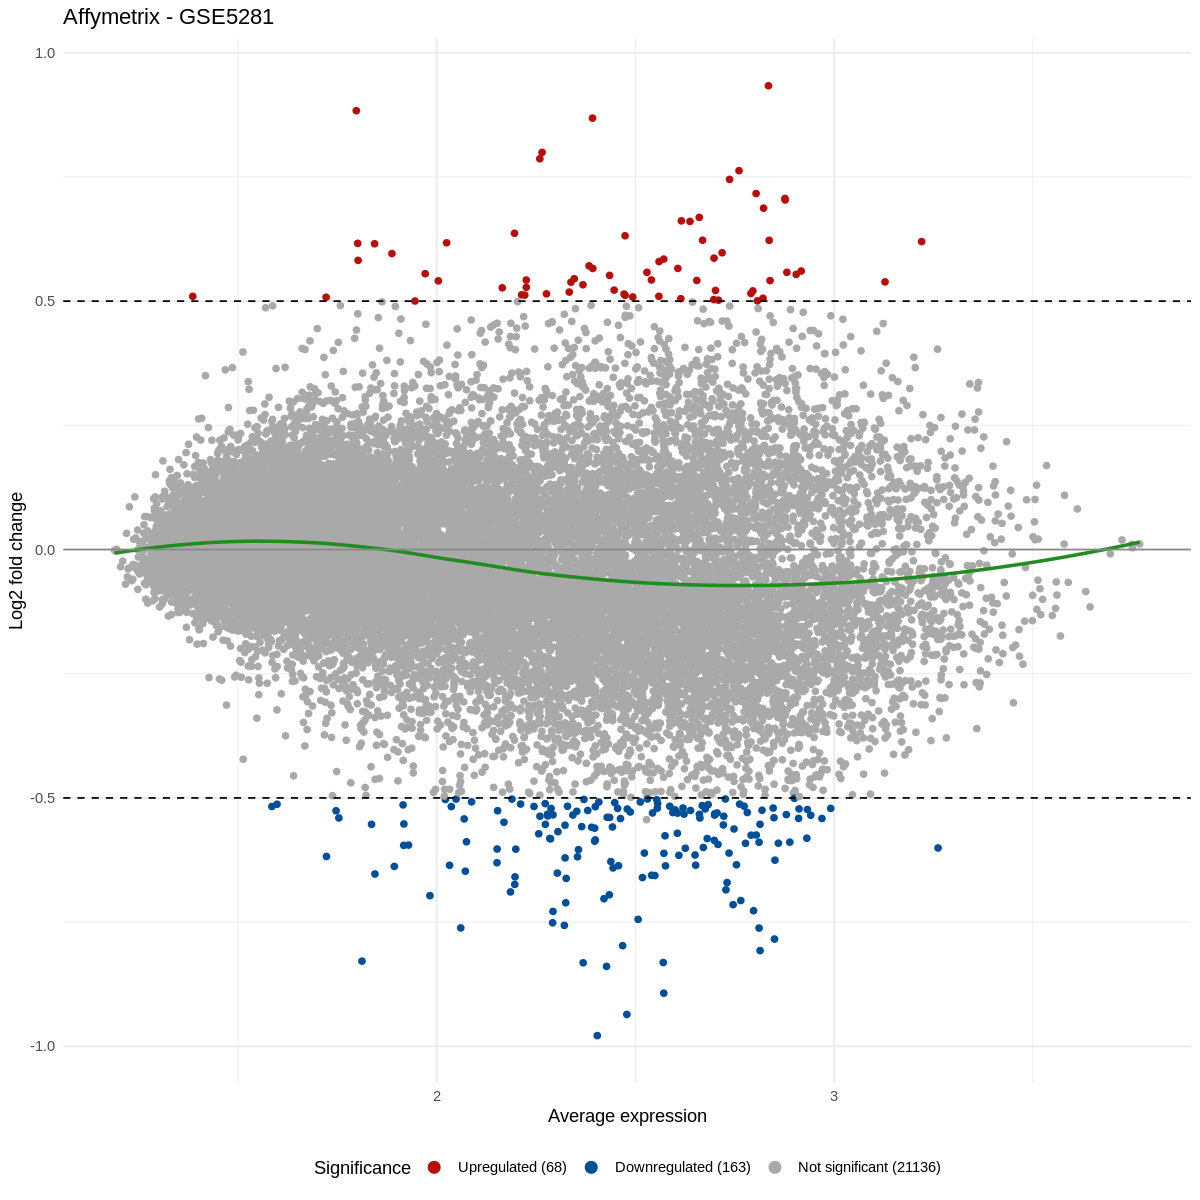

In [83]:
 # Visualize the differential analysis results using MA plot
RCPA::plotMA(affyDEResults, logFCThreshold = 0.5) + ggplot2::ggtitle("Affymetrix - GSE5281")

We can also use Volcano plot instead:

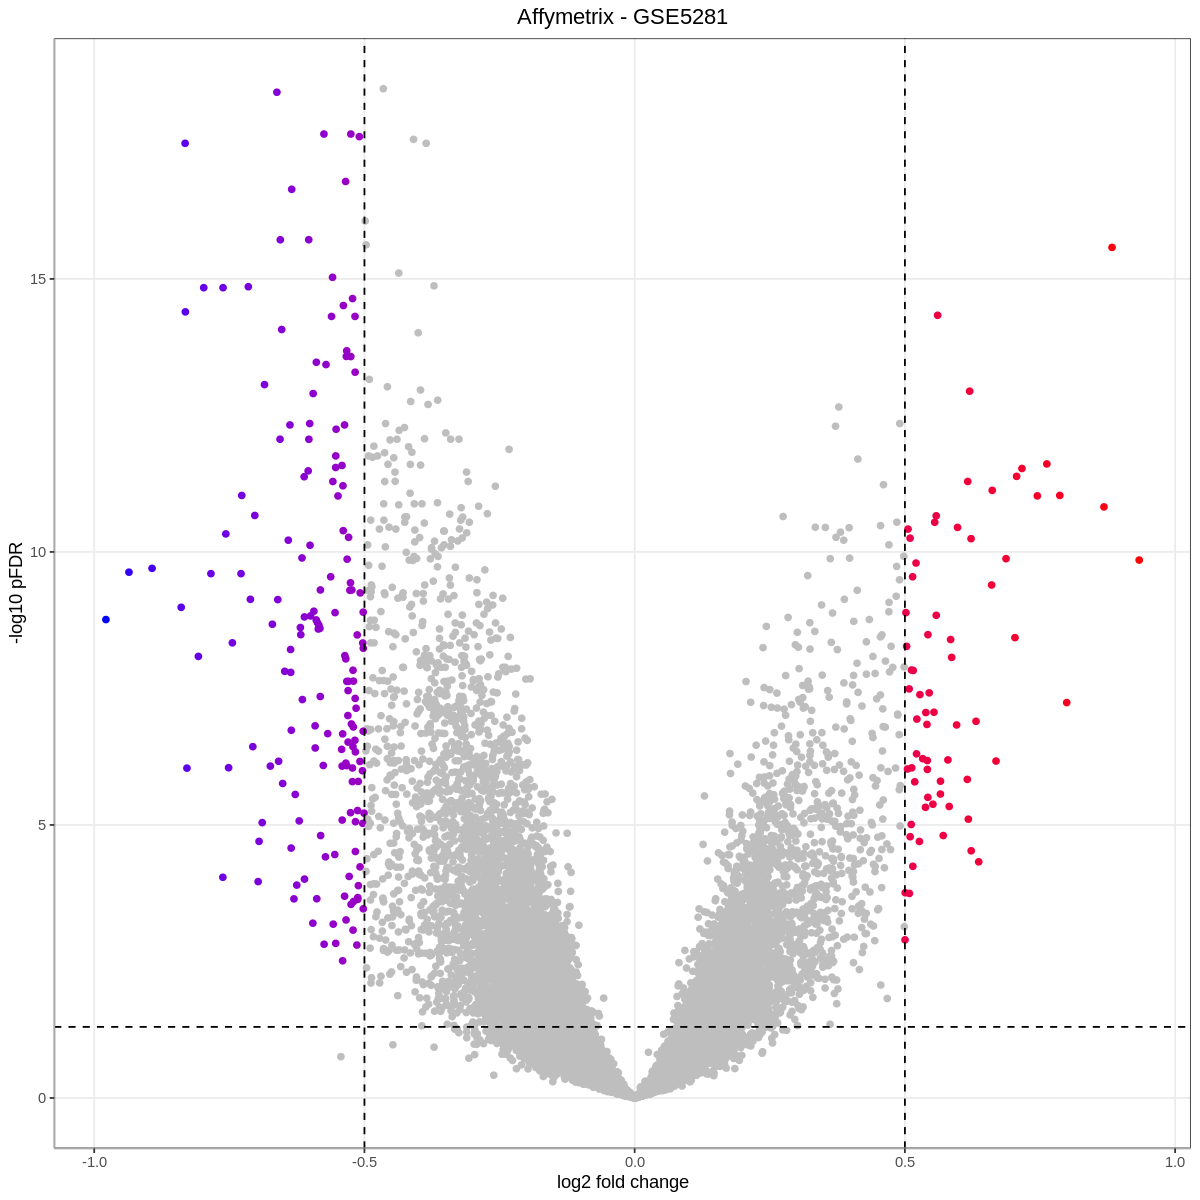

In [84]:
# Visualize the differential analysis results using volcano plot
RCPA::plotVolcanoDE(affyDEResults, logFCThreshold = 0.5) + ggplot2::ggtitle("Affymetrix - GSE5281")

**Agilent dataset**

In [20]:
# Load the Agilent data processed in Support Protocol 1
agilDataset <- RCPA::loadData("agilDataset")

We also start with creating design matrix and contrast matrix

In [21]:

# Access to the sample infomation data
agilSampleInfo <- SummarizedExperiment::colData(agilDataset)

# Add a column specifying the condition of the sample,
# which can be either normal or alzheimer
agilSampleConditions <- ifelse(grepl("healthy", agilSampleInfo$source_name_ch1), "normal", "alzheimer")
# Factorize the newly added column
agilSampleInfo$condition <- factor(agilSampleConditions)
# Update the colData attribute with new column
SummarizedExperiment::colData(agilDataset) <- agilSampleInfo

# Create a design matrix
agilDesign <- model.matrix(~0 + condition, data = SummarizedExperiment::colData(agilDataset))
# Create a constrast matrix
agilContrast <- limma::makeContrasts("conditionalzheimer-conditionnormal", levels = agilDesign)

The platform of the dataset GSE61196 is GPL4133, whose annotation is not included in our package. Therefore, we need to manually create a mapping data frame that will be used as `annotation` input of `runDEAnalysis()` function. The following are the steps that users can use to obtain these information:

In [22]:
# Download the information for GPL4133 platform:
GPL4133Pl <- GEOquery::getGEO(GEO = "GPL4133")

# Access to the dataTable slot in GPL4133Pl:
GPL4133Anno <- GEOquery::dataTable(GPL4133Pl)

# Access to annotation data
GPL4133AnnoTbl <- GEOquery::Table(GPL4133Anno)

# Display annotation (GPL4133AnnoTbl)
GPL4133AnnoTbl[9:14, c(5, 9, 10)]

SPOT_ID      GENE  GENE_SYMBOL
9  DarkCorner      NA            
10 DarkCorner      NA            
11 DarkCorner      NA            
12 A_24_P66027   9582 APOBEC3B   
13 A_32_P77178     NA            
14 A_23_P212522 23200 ATP11B

In [23]:

# Create the mapping data frame
GPL4133GeneMapping <- data.frame(FROM = GPL4133AnnoTbl$SPOT_ID, 
                                TO = as.character(GPL4133AnnoTbl$GENE), 
                                stringsAsFactors = F)
                                
#Display GPL4133GeneMapping:
GPL4133GeneMapping[15:20,]

FROM         TO       
15 A_24_P934473 100132006
16 A_24_P9671   3301     
17 A_32_P29551  NA       
18 A_24_P801451 10919    
19 A_32_P30710  9349     
20 A_32_P89523  NA

We then can perform differential analysis as follows:

In [24]:
# Run differential expression analysis
agilDEExperiment <- RCPA::runDEAnalysis(agilDataset, method = "limma", 
                                        design = agilDesign, contrast = agilContrast, 
                                        annotation = GPL4133GeneMapping)

# Extract the outcome of differential expression analysis
agilDEResults <- SummarizedExperiment::rowData(agilDEExperiment)

# Print in R console
as.data.frame(head(agilDEResults, c(3,5)))

PROBEID      ID     p.value      statistic logFC     
150166 A_32_P103815 150166 1.533592e-08  8.427029  0.8175931
50717  A_24_P76725  50717  5.698991e-08 -7.817456 -0.8581747
79818  A_23_P38830  79818  7.097424e-08 -7.717743 -0.8710655

Results visualization using MA plot and Volcano plot:

`geom_smooth()` using formula = 'y ~ x'


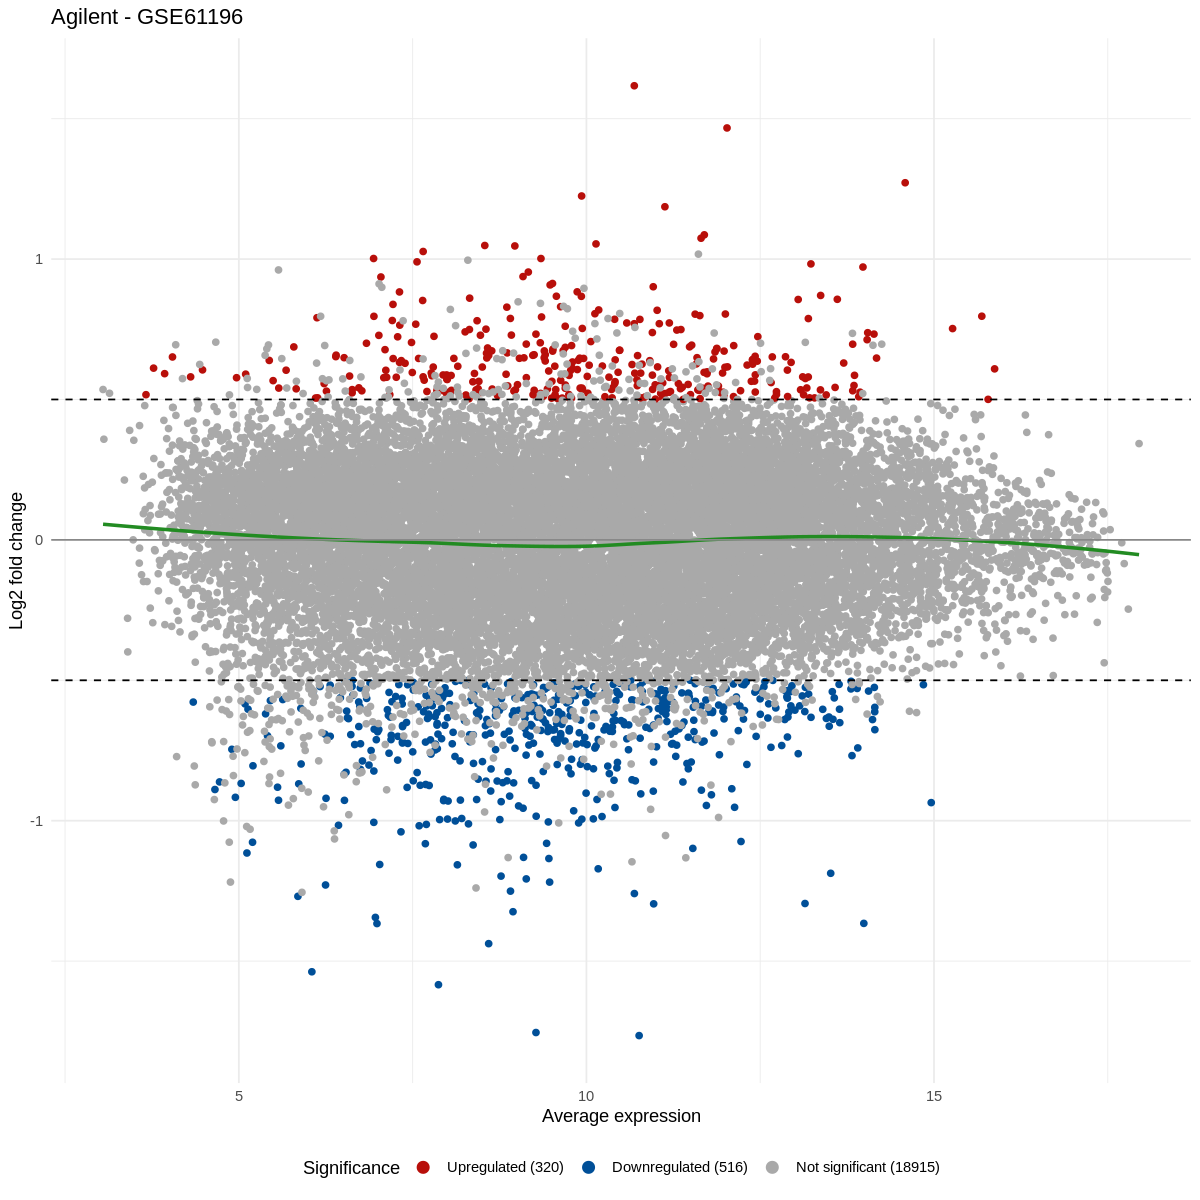

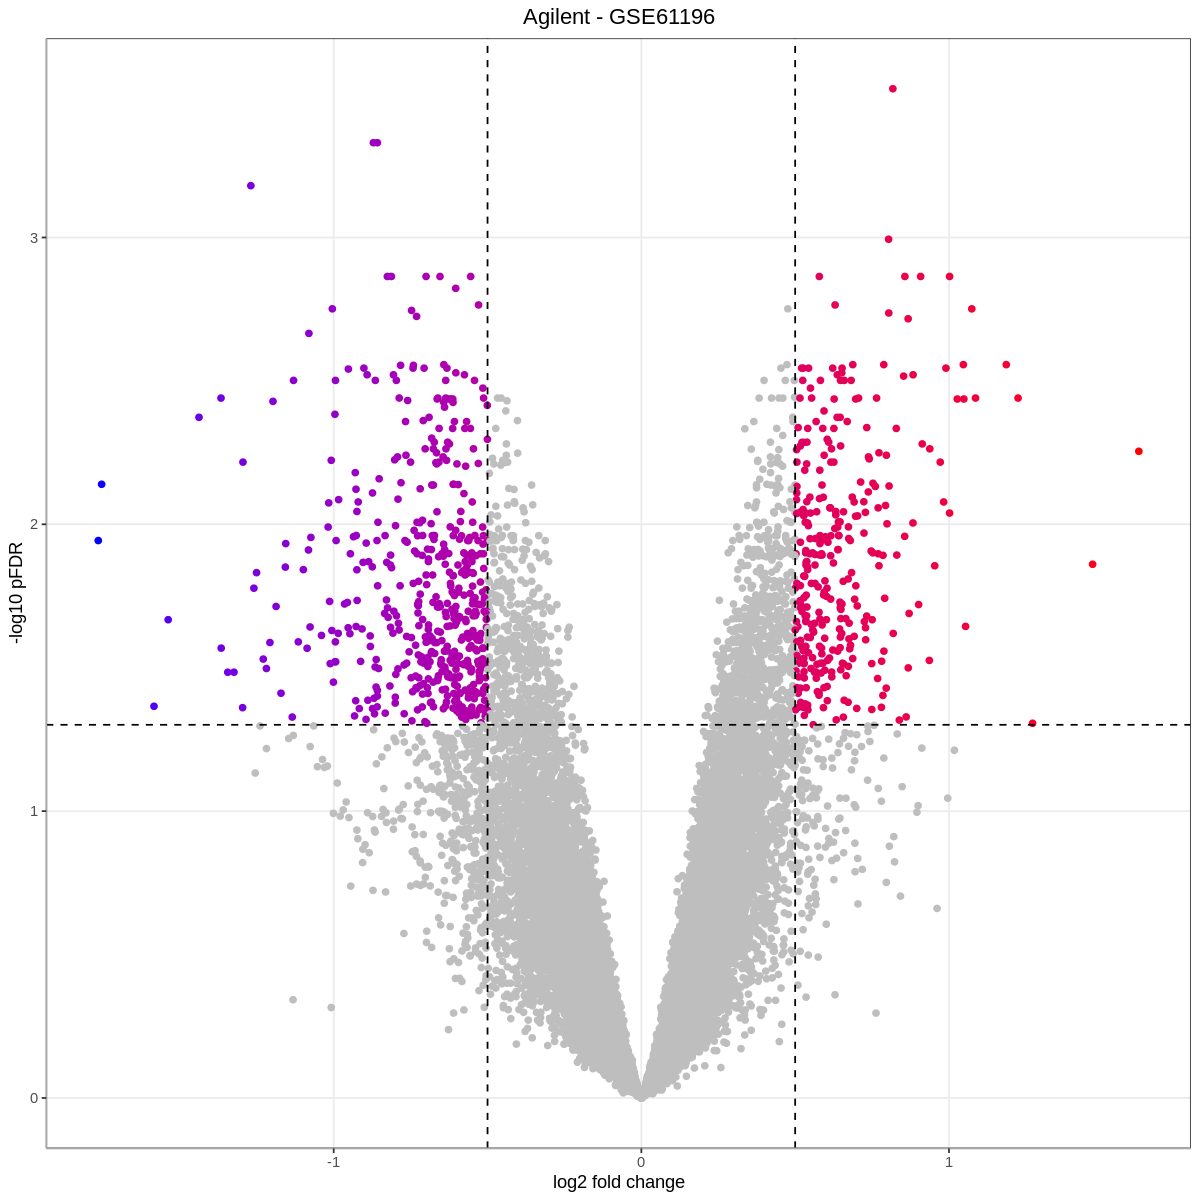

In [85]:
# MA plot
RCPA::plotMA(agilDEResults, logFCThreshold = 0.5) +
  ggplot2::ggtitle("Agilent - GSE61196")
      
# Volcano plot
RCPA::plotVolcanoDE(agilDEResults, logFCThreshold = 0.5) +
  ggplot2::ggtitle("Agilent - GSE61196")

## **Support Protocol 3: DIFFERENTIAL ANALYSIS OF RNA-SEQ DATA**

In [26]:
# Load the RNA-Seq dataset
RNASeqDataset <- RCPA::loadData("RNASeqDataset")

Create the design and contrast matrices:

In [27]:
# Access to the sample infomation data
RNASeqSampleInfo <- SummarizedExperiment::colData(RNASeqDataset)

# Add a column specifying the condition of the sample,
# which can be either normal or alzheimer
RNASeqSampleConditions <- ifelse(grepl("Alzheimer", RNASeqSampleInfo$characteristics_ch1.1), "alzheimer", "normal")

# Factorize the newly added column
RNASeqSampleInfo$condition <- factor(RNASeqSampleConditions)

# Update the colData attribute with new column
SummarizedExperiment::colData(RNASeqDataset) <- RNASeqSampleInfo

# Create design matrix
RNASeqDesign <- model.matrix(~0 + condition, data = SummarizedExperiment::colData(RNASeqDataset))

# Create constrast matrix
RNASeqContrast <- limma::makeContrasts("conditionalzheimer-conditionnormal", levels = RNASeqDesign)

Create a mapping between the ID used in the assay data and Entrez ID:

In [28]:
# Install the genome wide annotation database for human
if (!require("BiocManager", quietly = TRUE)) {
    install.packages("BiocManager")
}
BiocManager::install("org.Hs.eg.db")

# Load the annotation database
library(org.Hs.eg.db)

# Get current gene IDs used in RNA-Seq dataset
RNASeqGeneIDs <- rownames(RNASeqDataset)

# Create a mapping dataframe
ENSEMBLMapping <- AnnotationDbi::select(x = org.Hs.eg.db, 
                                        keys = RNASeqGeneIDs, 
                                        keytype = "SYMBOL", 
                                        columns = c("SYMBOL", "ENTREZID"))  
colnames(ENSEMBLMapping) <- c("FROM", "TO")

# Print first 6 rows into R console
head(ENSEMBLMapping)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'org.Hs.eg.db'”
Installation paths not writeable, unable to update packages
  path: /usr/lib/R/library
  packages:
    Matrix, boot, spatial
  path: /usr/lib/R/site-library
  packages:
    BH, CVST, DBI, DBItest, DEoptimR, DT, FNN, Formula, Hmisc, IRkernel,
    MatrixModels, RColorBrewer, RMySQL, RPostgreSQL, RSQLite, RSpectra, Rcpp,
    RcppArmadillo, RcppEigen, TH.data, XML, acepack, askpass, bench, bit, blob,
    broom, cachem, callr, caret, cba, checkmate, chron, classInt, cli,
    colorspace, commonmark, conquer, covr, cpp11, crayon, curl, data.table,
    dbplyr, ddalpha, decor, deldir, desc, 

FROM    TO    
1 SGIP1   84251 
2 NECAP2  55707 
3 AZIN2   113451
4 AGBL4   84871 
5 CLIC4   25932 
6 SLC45A1 50651

Perform differential analysis using the function `runDEAnalysis()`:

In [29]:
# Perform differential analysis
RNASeqDEExperiment <- RCPA::runDEAnalysis(RNASeqDataset, method = "DESeq2", 
                                        design = RNASeqDesign, contrast = RNASeqContrast, 
                                        annotation = ENSEMBLMapping)

# Extract the differential analysis results
RNASeqDEResults <- SummarizedExperiment::rowData(RNASeqDEExperiment)
# Print out the obtained DE analysis results
as.data.frame(head(RNASeqDEResults, c(3,5)))

using supplied model matrix

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 250 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



PROBEID      ID     p.value      statistic logFC     
29881  NPC1L1       29881  5.685181e-12  6.887324  3.6866472
58485  TRAPPC1      58485  2.443685e-11 -6.676708 -0.6202758
643749 TRAF3IP2-AS1 643749 3.827880e-11  6.610591  0.6058379

Visualize the results using MA and Volcano plot:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1636 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1636 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1636 rows containing missing values (`geom_point()`).”


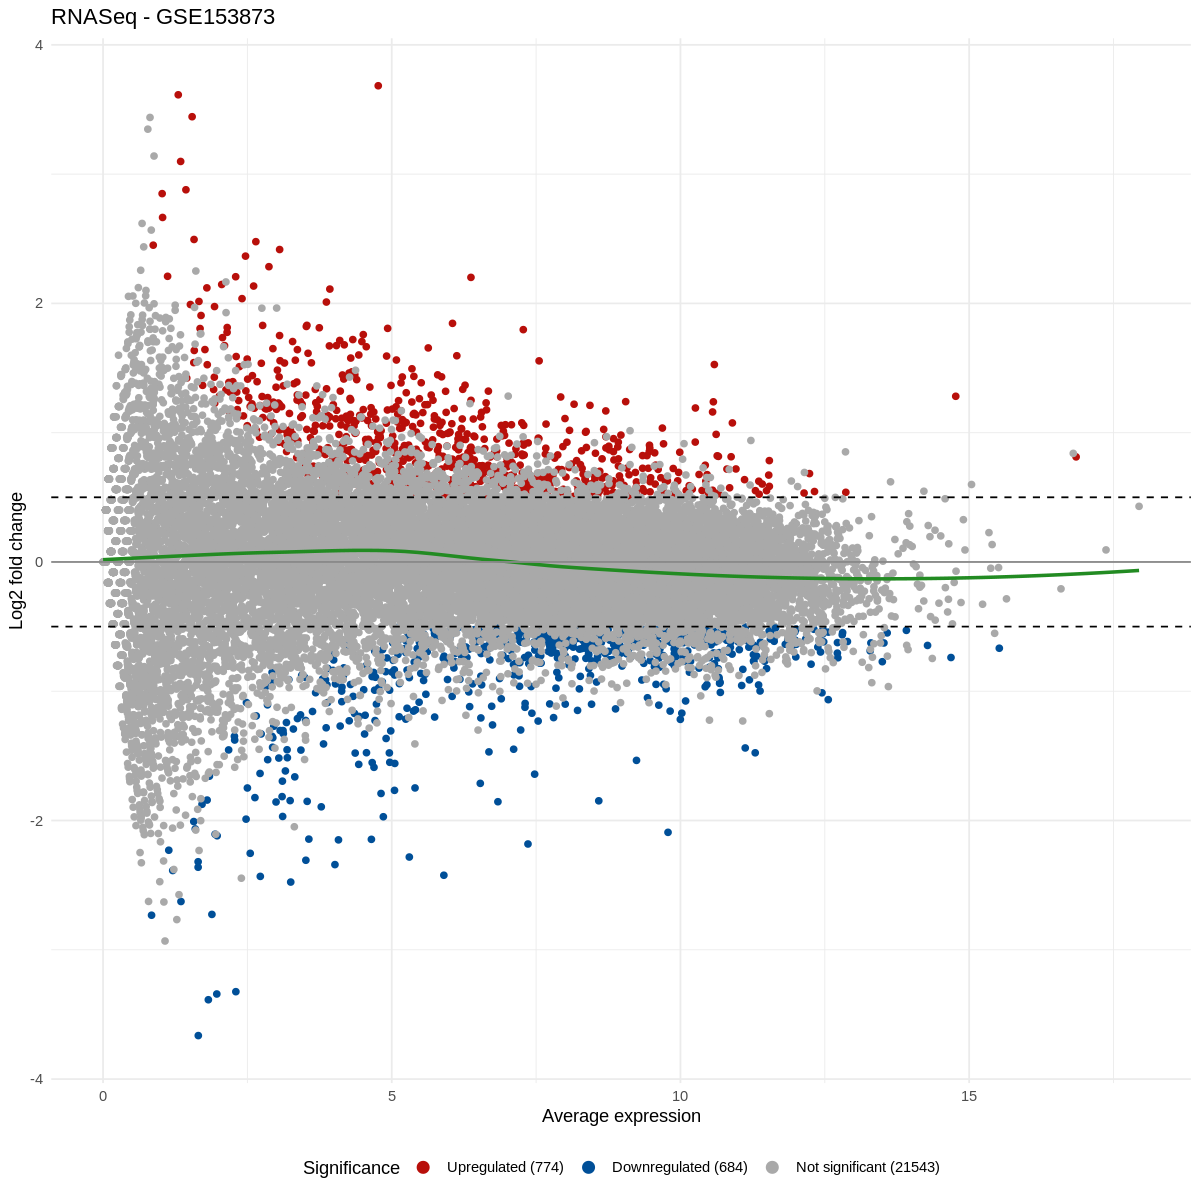

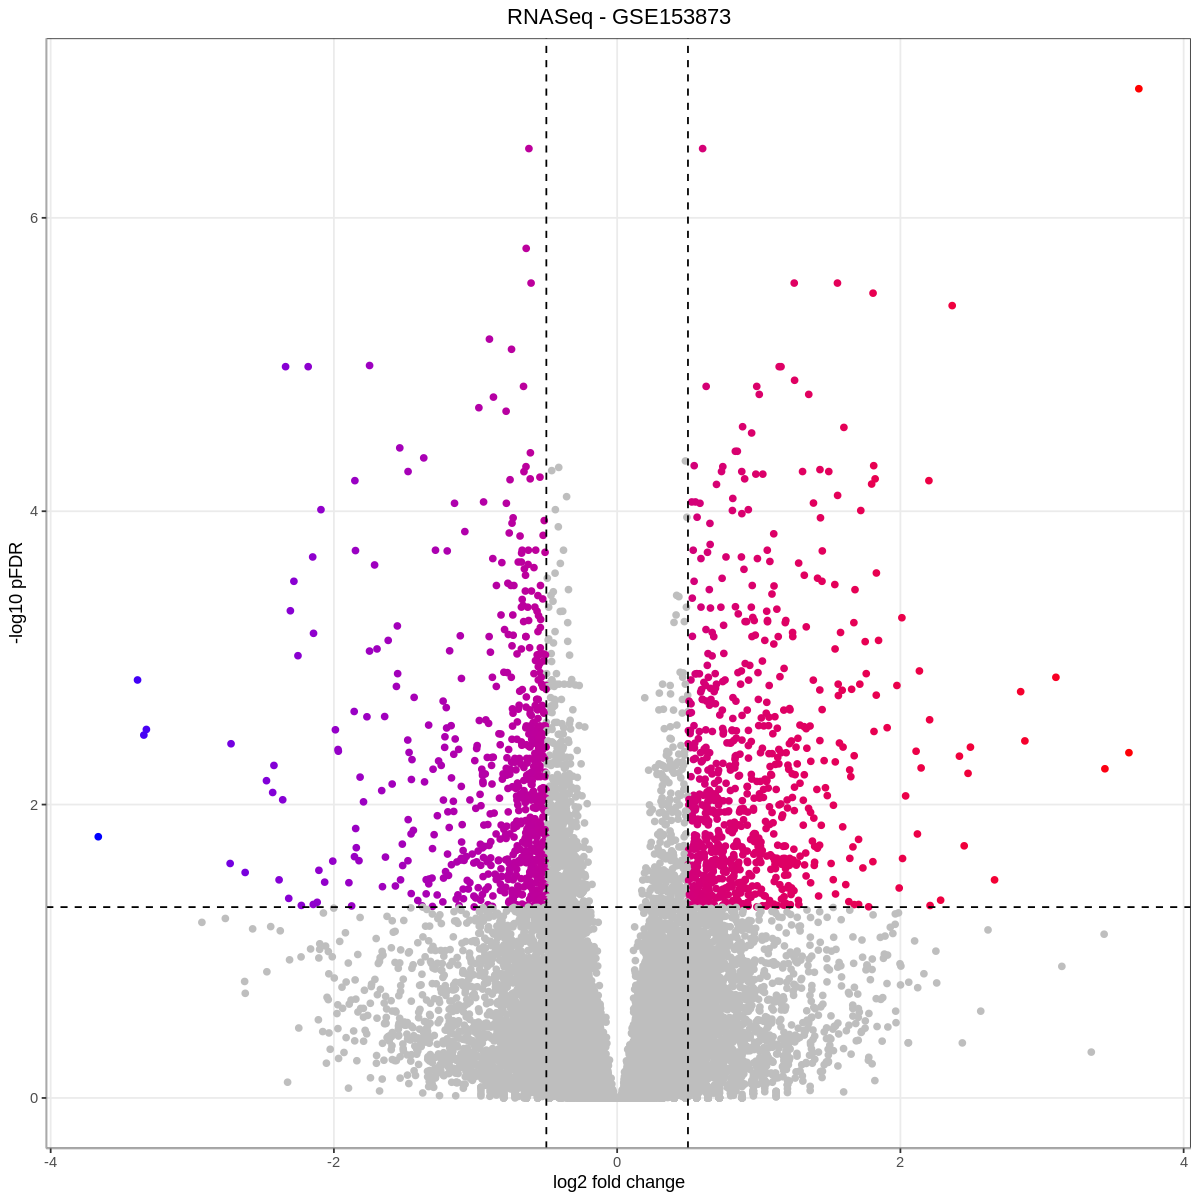

In [86]:
# MA plot
RCPA::plotMA(RNASeqDEResults, logFCThreshold = 0.5) +
    ggplot2::ggtitle("RNASeq - GSE153873")
# Volcano plot
RCPA::plotVolcanoDE(RNASeqDEResults, logFCThreshold = 0.5) +
    ggplot2::ggtitle("RNASeq - GSE153873")

## **Basic Protocol 4: GENE SET ENRICHMENT ANALYSIS**

In [31]:
# Loading differential results for Affymetrix data
affyDEExperiment <- RCPA::loadData("affyDEExperiment")
# Loading the results for Agilent data
agilDEExperiment <- RCPA::loadData("agilDEExperiment")
# Loading the results for RNA-Seq data
RNASeqDEExperiment <- RCPA::loadData("RNASeqDEExperiment")

We will need to prepare the gene sets using the function `getGeneSets`:

In [32]:
# Download gene sets from KEGG for human
KEGGGenesets <- RCPA::getGeneSets(database = "KEGG", org = "hsa")

# OR Download the gene sets from GO database
# taxid = 9606 for human 
GOTerms <- RCPA::getGeneSets(database = "GO", taxid = 9606, 
                            namespace = "biological_process")

We will use the KEGG gene sets and perform enrichment analysis on them. Let us start with enrichment analysis using KS test:

In [33]:
# Set seed to create reproducible results:
set.seed(1)

# Enrichment analysis using KS test and KEGG pathways:
# For Affymetrix dataset:
affyKSResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = affyDEExperiment,
                                        genesets = KEGGGenesets, method = "ks")

# For Agilent dataset:
agilKSResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = agilDEExperiment,
                                        genesets = KEGGGenesets, method = "ks")

# For RNA-Seq dataset:
RNASeqKSResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = RNASeqDEExperiment,
                                        genesets = KEGGGenesets, method = "ks")


# Display the result for KS test, for example, using RNA-Seq dataset:
RNASeqKSResult[c(1:5), c("ID", "p.value", "pFDR", "score", "name")]

Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the presence of ties”
Warning message in ks.test.default(cur.DEhit, cur.DEmiss):
“p-value will be approximate in the p

ID            p.value pFDR score    name                         
1 path:hsa00190 0       0    1.583977 Oxidative phosphorylation    
2 path:hsa05010 0       0    1.054510 Alzheimer disease            
3 path:hsa05012 0       0    1.280578 Parkinson disease            
4 path:hsa05014 0       0    1.137685 Amyotrophic lateral sclerosis
5 path:hsa05016 0       0    1.241508 Huntington disease

Enrichment analysis using Wilcoxon test:

In [34]:
# Enrichment analysis using Wilcoxon test and KEGG pathways
set.seed(1)

# For Affymetrix dataset:
affyWilcoxResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = affyDEExperiment, 
                                            genesets = KEGGGenesets, 
                                            method = "wilcox")

# For Agilent dataset:
agilWilcoxResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = agilDEExperiment, 
                                            genesets = KEGGGenesets, 
                                            method = "wilcox")

# For RNA-Seq dataset:
RNASeqWilcoxResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = RNASeqDEExperiment, 
                                            genesets = KEGGGenesets, 
                                            method = "wilcox")

# Display the result for Wilcoxon test, for example, using RNA-Seq dataset
RNASeqWilcoxResult[c(1:5), c("ID", "p.value", "pFDR", "score", "name")]

ID            p.value      pFDR         score    
1 path:hsa05016 6.805416e-38 1.857152e-35 1.2415082
2 path:hsa05014 1.046283e-37 1.857152e-35 1.1376852
3 path:hsa05012 5.723754e-34 6.773108e-32 1.2805778
4 path:hsa05022 1.728779e-32 1.534291e-30 0.9671982
5 path:hsa00190 2.080421e-28 1.477099e-26 1.5839771
  name                                             
1 Huntington disease                               
2 Amyotrophic lateral sclerosis                    
3 Parkinson disease                                
4 Pathways of neurodegeneration - multiple diseases
5 Oxidative phosphorylation

Perform enrichment analysis using over-representation analysis (ORA):

In [35]:
# Specify the threshold to identify DE genes, which are required for ORA
oraArgsList <- list(pThreshold = 0.05)

# Set seed to create reproducible results
set.seed(1)

# Enrichment analysis using ORA and KEGG pathways
# For Affymetrix dataset:
affyORAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = affyDEExperiment,
                                          genesets = KEGGGenesets, method = "ora",
                                          ORAArgs = oraArgsList)

# For Agilent dataset:
agilORAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = agilDEExperiment,
                                          genesets = KEGGGenesets, method = "ora",
                                          ORAArgs = oraArgsList)

# For RNA-Seq dataset:
RNASeqORAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = RNASeqDEExperiment,
                                          genesets = KEGGGenesets, method = "ora",
                                          ORAArgs = oraArgsList)

# Display, for example, the result of RNA-Seq data:
RNASeqORAResult[c(1:5), c("ID", "p.value", "pFDR", "score", "name")]

ID            p.value pFDR score    name                         
1 path:hsa00190 0       0    1.583977 Oxidative phosphorylation    
2 path:hsa05010 0       0    1.054510 Alzheimer disease            
3 path:hsa05012 0       0    1.280578 Parkinson disease            
4 path:hsa05014 0       0    1.137685 Amyotrophic lateral sclerosis
5 path:hsa05016 0       0    1.241508 Huntington disease

Perform enrichment analysis using fast gene set enrichment analysis (FGSEA):

In [36]:
# Running fgsea requires the package fgsea to be installed
# The runGeneSetAnalysis will ask to install the package if it is not already installed
# Here we install it beforehand
BiocManager::install("fgsea", update = F)

# Specify a list of arguments tailored for FGSEA:
FGSEAArgsList <- list(minSize = 10)

# Set seed to create reproducible results
set.seed(1)

# Enrichment analysis using FSGEA and KEGG pathway:
# For Affymetrix dataset:
affyFGSEAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = affyDEExperiment,
                                            genesets = KEGGGenesets, method = "fgsea", 
                                            FgseaArgs = FGSEAArgsList)

# For Agilent dataset:
agilFGSEAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = agilDEExperiment,
                                            genesets = KEGGGenesets, method = "fgsea", 
                                            FgseaArgs = FGSEAArgsList)

# For RNA-Seq dataset:
RNASeqFGSEAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = RNASeqDEExperiment,
                                            genesets = KEGGGenesets, method = "fgsea",
                                            FgseaArgs = FGSEAArgsList)

# Display the result of RNA-Seq using FGSEA, for example:
RNASeqFGSEAResult[c(1:5), c("ID", "p.value", "pFDR", "score", "name")]

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'fgsea'”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


ID            p.value      pFDR         score     
1 path:hsa05014 5.090980e-36 1.725842e-33 -0.5843083
2 path:hsa05016 2.439022e-32 4.134142e-30 -0.5969594
3 path:hsa05012 3.878555e-29 4.382767e-27 -0.6067353
4 path:hsa05020 8.000242e-29 6.780205e-27 -0.5977833
5 path:hsa00190 2.107213e-26 1.428690e-24 -0.7429690
  name                         
1 Amyotrophic lateral sclerosis
2 Huntington disease           
3 Parkinson disease            
4 Prion disease                
5 Oxidative phosphorylation

Perform enrichment analysis using gene set analysis (GSA):

In [37]:
# Running GSA requires the package GSA to be installed
# The runGeneSetAnalysis will ask to install the package if it is not already installed
# Here we install it beforehand
BiocManager::install("GSA", update = F)

# Specify the list of arguments customized for GSA
GSAArgsList <- list(method = "maxmean", minsize = 15, maxsize = 500, nperms = 1000)

# Set seed to create reproducible results
set.seed(1)

# Enrichment analysis using GSA and KEGG pathways
# For Affymetrix dataset:
affyGSAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = affyDEExperiment,
                                          genesets = KEGGGenesets, method = "gsa", 
                                          GSAArgs = GSAArgsList)

# For Agilent dataset:
agilGSAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = agilDEExperiment,
                                          genesets = KEGGGenesets, method = "gsa", 
                                          GSAArgs = GSAArgsList)

# For RNA-Seq dataset
RNASeqGSAResult <- RCPA::runGeneSetAnalysis(summarizedExperiment = RNASeqDEExperiment,
                                        genesets = KEGGGenesets, method = "gsa",
                                        GSAArgs = GSAArgsList)

# Display the result of RNA-Seq using GSA:
RNASeqGSAResult[c(1:5), c("ID", "p.value", "pFDR", "score", "name")]

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'GSA'”


perm= 10 / 1000 
perm= 20 / 1000 
perm= 30 / 1000 
perm= 40 / 1000 
perm= 50 / 1000 
perm= 60 / 1000 
perm= 70 / 1000 
perm= 80 / 1000 
perm= 90 / 1000 
perm= 100 / 1000 
perm= 110 / 1000 
perm= 120 / 1000 
perm= 130 / 1000 
perm= 140 / 1000 
perm= 150 / 1000 
perm= 160 / 1000 
perm= 170 / 1000 
perm= 180 / 1000 
perm= 190 / 1000 
perm= 200 / 1000 
perm= 210 / 1000 
perm= 220 / 1000 
perm= 230 / 1000 
perm= 240 / 1000 
perm= 250 / 1000 
perm= 260 / 1000 
perm= 270 / 1000 
perm= 280 / 1000 
perm= 290 / 1000 
perm= 300 / 1000 
perm= 310 / 1000 
perm= 320 / 1000 
perm= 330 / 1000 
perm= 340 / 1000 
perm= 350 / 1000 
perm= 360 / 1000 
perm= 370 / 1000 
perm= 380 / 1000 
perm= 390 / 1000 
perm= 400 / 1000 
perm= 410 / 1000 
perm= 420 / 1000 
perm= 430 / 1000 
perm= 440 / 1000 
perm= 450 / 1000 
perm= 460 / 1000 
perm= 470 / 1000 
perm= 480 / 1000 
perm= 490 / 1000 
perm= 500 / 1000 
perm= 510 / 1000 
perm= 520 / 1000 
perm= 530 / 1000 
perm= 540 / 1000 
perm= 550 / 1000 
perm= 560 / 1000 
p

ID            p.value pFDR      score     name                           
1 path:hsa00020 0.000   0.0000000 1.4165619 Citrate cycle (TCA cycle)      
2 path:hsa01200 0.000   0.0000000 0.7470086 Carbon metabolism              
3 path:hsa05014 0.000   0.0000000 0.6678376 Amyotrophic lateral sclerosis  
4 path:hsa05016 0.000   0.0000000 0.7036773 Huntington disease             
5 path:hsa01210 0.002   0.1113333 0.8069836 2-Oxocarboxylic acid metabolism

Visualize the results using Volcano plot:

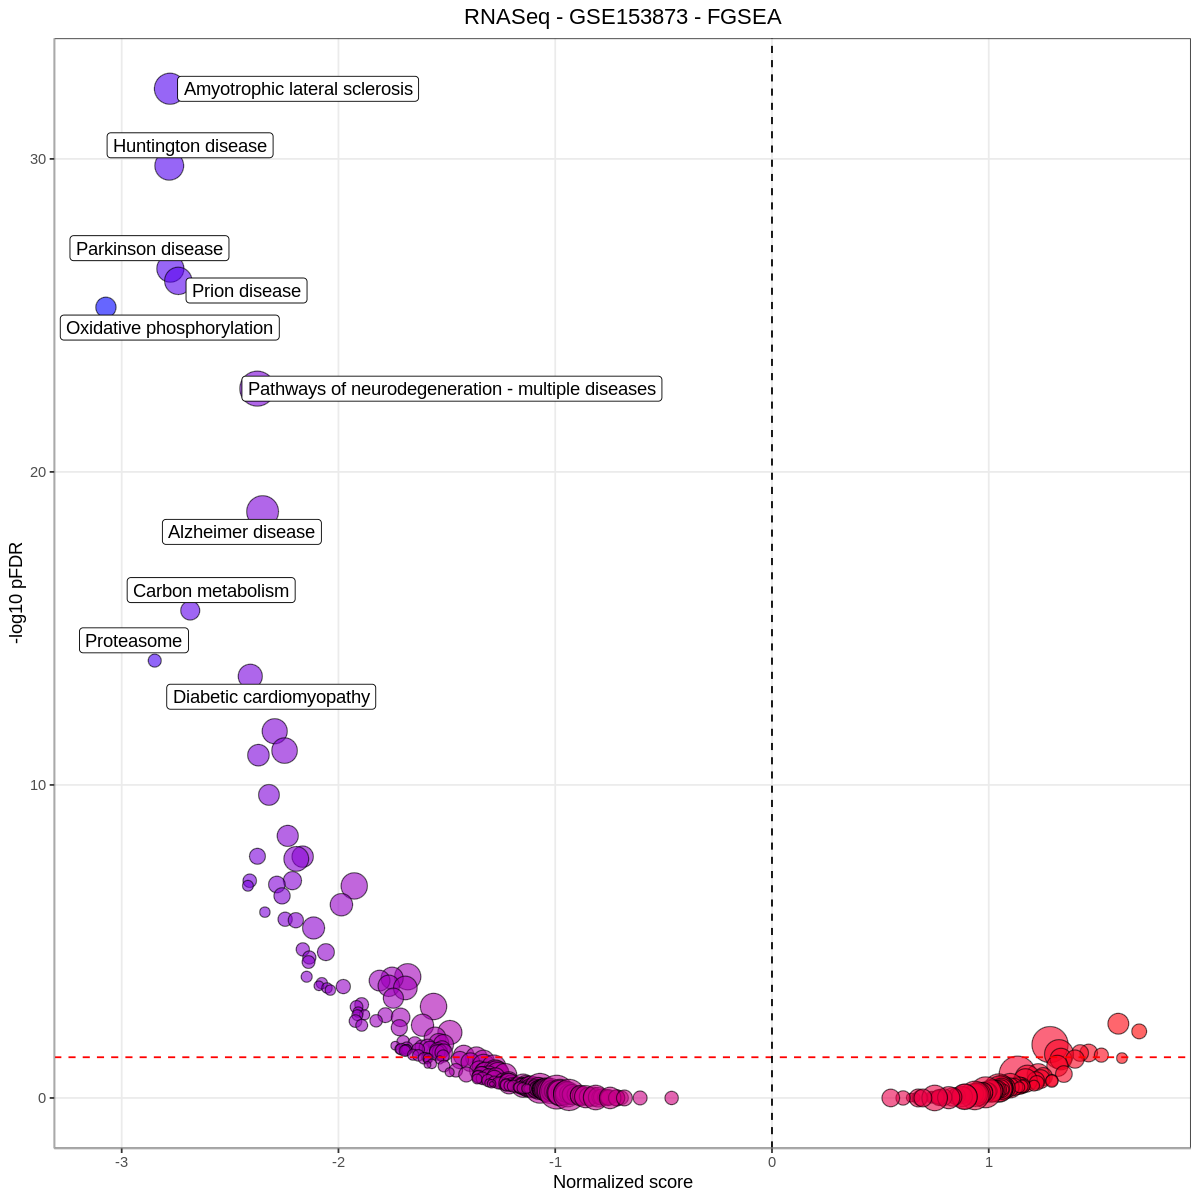

In [87]:
# Visualize the enrichment result of RNA-Seq using FGSEA
# We can replace RNASeqFGSEAResult with other results as shown above:
RCPA::plotVolcanoPathway(PAResult = RNASeqFGSEAResult, topToLabel = 10) +
        ggplot2::ggtitle("RNASeq - GSE153873 - FGSEA")

Visualize the results using forest plot:

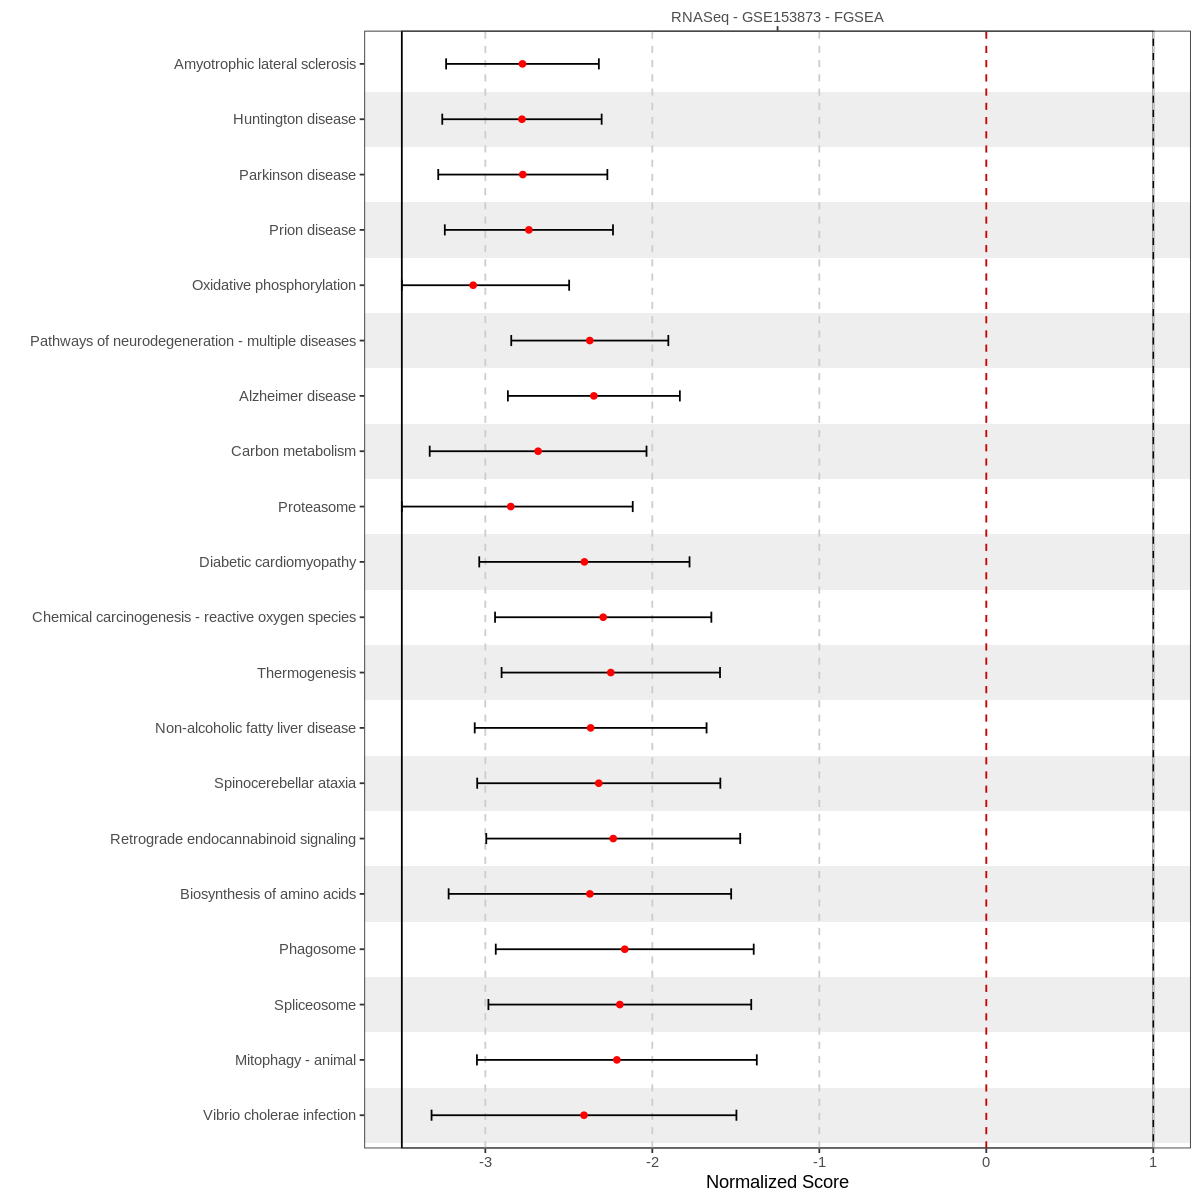

In [88]:
# Create a list containing the top 20 pathways from the result
# We can replace RNASeqFGSEAResult by other results as shown above:
RNASeqFGSEAToPlot <- list("RNASeq - GSE153873 - FGSEA" = RNASeqFGSEAResult[1:20,])

# Generate forest plot:
RCPA::plotForest(resultsList = RNASeqFGSEAToPlot, yAxis = "name", statLims = c(-3.5, 1))

Visualize the enrichment analysis results as a network of pathway graph (the function in this snippet requires a web browser to run):

In [40]:
# This code is specific for Jupyter Notebook to show the pathway network plots with a reasonable height
IRdisplay::display_javascript('
const style = document.createElement("style")
style.textContent = "iframe.jp-OutputArea-output { height: 500px; }" //change this to modify the height of the plot
document.head.appendChild(style)
')

In [41]:
# Select top 20 pathways from the results
# We can replace RNASeqFGSEAResult with other results as shown above:
RNASeqFGSEAToPlot <- list("RNASeq - GSE153873 - FGSEA" = RNASeqFGSEAResult[1:20,])

# Get IDs for top 20 pathways
selectedPathways <- RNASeqFGSEAResult$ID[1:20]

# Generate network graph of selected pathways
pltHtml <- RCPA::plotPathwayNetwork(
    PAResults = RNASeqFGSEAToPlot,
    genesets = KEGGGenesets,
    selectedPathways = selectedPathways,
    statistic = "normalizedScore",
    mode = "continuous",
    edgeThreshold = 0.75
)

<!DOCTYPE html>
 
 
 RCyjs 
 
 
 
 
 
 
 
 Fit 
 Fit Selected 
 SFN 
 Hide Unselected 
 Show All 
 Layout: 
 
 
 breadthfirst 
 circle 
 cola 
 concentric 
 cose 
 cose-bilkent 
 dagre 
 grid 
 random

The plot is saved to /tmp/Rtmpw11pD0/file45ab73a1e9df.html



## **Basic Protocol 5: TOPOLOGY-BASED (TB) PATHWAY ANALYSIS**

In [42]:
# loading differential results for Affymetrix data
affyDEExperiment <- RCPA::loadData("affyDEExperiment")
# loading the results for Agilent data
agilDEExperiment <- RCPA::loadData("agilDEExperiment")
# loading the results for RNA-Seq data
RNASeqDEExperiment <- RCPA::loadData("RNASeqDEExperiment")

Retrieve pathway topology from KEGG for SPIA:

In [43]:
# Install required dependencies beforehand
BiocManager::install("ROntoTools", update = F)

# Retrieve gene networks from KEGG for SPIA
SPIANetwork <- RCPA::getSPIAKEGGNetwork(org = "hsa", updateCache = FALSE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ROntoTools'”

Attaching package: ‘graph’


The following object is masked from ‘package:Biostrings’:

    complement



Attaching package: ‘KEGGgraph’


The following object is masked from ‘package:graphics’:

    plot


The following object is masked from ‘package:base’:

    plot



Attaching package: ‘grid’


The following object is masked from ‘package:Biostrings’:

    pattern



Attaching package: ‘Rgraphviz’


The following objects are masked from ‘package:oligo’:

    getX, getY


The following objects are masked from ‘package:IRanges’:

    from, to


The following objects are masked from

  |======================================================================| 100%

Using cached pathway data. Database info:
pathway          KEGG Pathway Database
path             Release 73.0+/01-03, Jan 15
                 Kanehisa Laboratories
                 343,170 entries



Run SPIA on the three datasets:

In [44]:

# Specify the list of arguments specific for SPIA
SPIAArgsList <- list(nB = 1000, pThreshold = 0.05)

# Set seed to create reproducible results
set.seed(1)

# Run SPIA on Affymetrix dataset:
affySPIAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = affyDEExperiment,
                                           network = SPIANetwork, method = "spia", 
                                           SPIAArgs = SPIAArgsList)

# Run SPIA on Agilent dataset:
agilSPIAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = agilDEExperiment,
                                           network = SPIANetwork, method = "spia", 
                                           SPIAArgs = SPIAArgsList)

# Run SPIA on RNA-Seq dataset:
RNASeqSPIAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = RNASeqDEExperiment,
                                            network = SPIANetwork, method = "spia",
                                            SPIAArgs = SPIAArgsList)

# Display the result for RNA-Seq dataset:
RNASeqSPIAResult[1:5, c("ID", "p.value", "pFDR", "score", "name")]

Performing pathway analysis...



  |======================================================================| 100%

Analysis completed in 16.11921 secs.

Performing pathway analysis...



  |======================================================================| 100%

Analysis completed in 13.50308 secs.

Performing pathway analysis...



  |======================================================================| 100%

Analysis completed in 13.80566 secs.



ID            p.value      pFDR         score   
1 path:hsa05016 3.913179e-17 5.321923e-15 59.28615
2 path:hsa05010 3.613571e-13 2.457228e-11 35.58629
3 path:hsa04145 1.798467e-07 8.153051e-06 33.75798
4 path:hsa05120 2.164681e-06 7.359917e-05 55.59921
5 path:hsa04141 4.996984e-06 1.359180e-04 50.16647
  name                                                      
1 Huntington disease                                        
2 Alzheimer disease                                         
3 Phagosome                                                 
4 Epithelial cell signaling in Helicobacter pylori infection
5 Protein processing in endoplasmic reticulum

Retreive pathway topology from KEGG for CePa ORA and CePa GSA:

In [45]:
# Install required dependencies beforehand
BiocManager::install("CePa", update = F)

# Retrieve pathway information from KEGG for CePa ORA and CePa GSA:
CePaNetwork <- RCPA::getCePaPathwayCatalogue(org = "hsa", updateCache = FALSE)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'CePa'”

Attaching package: ‘CePa’


The following object is masked from ‘package:tidyr’:

    spread


Using cached pathway data. Database info:
pathway          KEGG Pathway Database
path             Release 73.0+/01-03, Jan 15
                 Kanehisa Laboratories
                 343,170 entries

Parsing pathway data:



  |======================================================================| 100%

Perform pathway analysis using CePa ORA:

In [46]:
# Specify the list of argument tailored for CePa ORA
CePaORAArgsList <- list(cen = "equal.weight", pThreshold = 0.05)

# Set seed to create reproducible results
set.seed(1)

# Run CePa ORA on Affymetrix dataset:
affyCePaORAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = affyDEExperiment,
                                              network = CePaNetwork, method = "cepaORA", 
                                              CePaORAArgs = CePaORAArgsList)

# Run CePa ORA on Agilent dataset:
agilCePaORAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = agilDEExperiment,
                                              network = CePaNetwork, method = "cepaORA", 
                                              CePaORAArgs = CePaORAArgsList)

# Run CePa ORA on RNA-Seq dataset:
RNASeqCePaORAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = RNASeqDEExperiment, 
                                                network = CePaNetwork, method = "cepaORA", 
                                                CePaORAArgs = CePaORAArgsList)
                                                
# Display the result for RNA-Seq dataset (for example):
RNASeqCePaORAResult[1:5, c("ID", "p.value", "pFDR", "score", "name")]

  Calculate pathway scores...
    1/149, path:hsa03008...
      - equal.weight: 0.862
    2/149, path:hsa03013...
      - equal.weight: 0.256
    3/149, path:hsa03015...
      - equal.weight: 0.013
    4/149, path:hsa03018...
      - equal.weight: 0.382
    5/149, path:hsa03320...
      - equal.weight: 0.902
    6/149, path:hsa03460...
      - equal.weight: 0.872
    7/149, path:hsa04010...
      - equal.weight: 0.002
    8/149, path:hsa04012...
      - equal.weight: 0.001
    9/149, path:hsa04020...
      - equal.weight: 0.082
    10/149, path:hsa04060...
      - equal.weight: 0.986
    11/149, path:hsa04062...
      - equal.weight: 0.136
    12/149, path:hsa04064...
      - equal.weight: 0.265
    13/149, path:hsa04066...
      - equal.weight: 0.001
    14/149, path:hsa04080...
      - equal.weight: 0.991
    15/149, path:hsa04110...
      - equal.weight: 0.118
    16/149, path:hsa04114...
      - equal.weight: 0.062
    17/149, path:hsa04115...
      - equal.weight: 0.019
    18/149

ID            p.value     pFDR       score
1 path:hsa04110 0.000999001 0.02126445 49.49
2 path:hsa04141 0.000999001 0.02126445 23.23
3 path:hsa04145 0.000999001 0.02126445 17.17
4 path:hsa04721 0.000999001 0.02126445 11.11
5 path:hsa05130 0.000999001 0.02126445 21.21
  name                                       
1 Cell cycle                                 
2 Protein processing in endoplasmic reticulum
3 Phagosome                                  
4 Synaptic vesicle cycle                     
5 Pathogenic Escherichia coli infection

Perform pathway analysis using CePa GSA:

In [47]:
# Specify the list of arguments tailored for CePa GSA
CePaGSAArgsList <- list(cen = "equal.weight", nlevel = "tvalue_abs", plevel = "mean")

# Set seed to reproducible results
set.seed(1)

# Run CePa GSA for Affymetrix dataset
affyCePaGSAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = affyDEExperiment,
                                              network = CePaNetwork, method = "cepaGSA", 
                                              CePaGSAArgs = CePaGSAArgsList)

# Run CePa GSA for Agilent dataset
agilCePaGSAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = agilDEExperiment,
                                              network = CePaNetwork, method = "cepaGSA", 
                                              CePaGSAArgs = CePaGSAArgsList)

# Run CePa GSA on RNA-Seq dataset
RNASeqCePaGSAResult <- RCPA::runPathwayAnalysis(summarizedExperiment = RNASeqDEExperiment, 
                                                network = CePaNetwork, method = "cepaGSA", 
                                                CePaGSAArgs = CePaGSAArgsList)

# Display the result for RNA-Seq dataset (for example):
RNASeqCePaGSAResult[1:5, c("ID", "p.value", "pFDR", "score", "name")]

The 'equal.weight' is used as centrality measurement.



  Calculate gene level values.
  Calculate pathway score...
    1/149, path:hsa03008...
      Calculate node level value and permutate sample labels...
      3 genes measured in the pathway...
      - equal.weight: 0.001
    2/149, path:hsa03013...
      Calculate node level value and permutate sample labels...
      122 genes measured in the pathway...
      - equal.weight: 0.001
    3/149, path:hsa03015...
      Calculate node level value and permutate sample labels...
      68 genes measured in the pathway...
      - equal.weight: 0.001
    4/149, path:hsa03018...
      Calculate node level value and permutate sample labels...
      17 genes measured in the pathway...
      - equal.weight: 0.001
    5/149, path:hsa03320...
      Calculate node level value and permutate sample labels...
      62 genes measured in the pathway...
      - equal.weight: 0.001
    6/149, path:hsa03460...
      Calculate node level value and permutate sample labels...
      39 genes measured in the pathway

The 'equal.weight' is used as centrality measurement.



  Calculate gene level values.
  Calculate pathway score...
    1/149, path:hsa03008...
      Calculate node level value and permutate sample labels...
      3 genes measured in the pathway...
      - equal.weight: 0.001
    2/149, path:hsa03013...
      Calculate node level value and permutate sample labels...
      122 genes measured in the pathway...
      - equal.weight: 0.034
    3/149, path:hsa03015...
      Calculate node level value and permutate sample labels...
      68 genes measured in the pathway...
      - equal.weight: 0.014
    4/149, path:hsa03018...
      Calculate node level value and permutate sample labels...
      17 genes measured in the pathway...
      - equal.weight: 0.023
    5/149, path:hsa03320...
      Calculate node level value and permutate sample labels...
      62 genes measured in the pathway...
      - equal.weight: 0.02
    6/149, path:hsa03460...
      Calculate node level value and permutate sample labels...
      39 genes measured in the pathway.

The 'equal.weight' is used as centrality measurement.



  Calculate gene level values.
  Calculate pathway score...
    1/149, path:hsa03008...
      Calculate node level value and permutate sample labels...
      3 genes measured in the pathway...
      - equal.weight: 0.689
    2/149, path:hsa03013...
      Calculate node level value and permutate sample labels...
      127 genes measured in the pathway...
      - equal.weight: 0.651
    3/149, path:hsa03015...
      Calculate node level value and permutate sample labels...
      70 genes measured in the pathway...
      - equal.weight: 0.842
    4/149, path:hsa03018...
      Calculate node level value and permutate sample labels...
      18 genes measured in the pathway...
      - equal.weight: 0.633
    5/149, path:hsa03320...
      Calculate node level value and permutate sample labels...
      62 genes measured in the pathway...
      - equal.weight: 0.921
    6/149, path:hsa03460...
      Calculate node level value and permutate sample labels...
      39 genes measured in the pathway

ID            p.value    pFDR     score     name                     
1 path:hsa05310 0.07692308 0.991009 1.4918263 Asthma                   
2 path:hsa04978 0.29470529 0.991009 0.9709608 Mineral absorption       
3 path:hsa04721 0.31768232 0.991009 0.8624085 Synaptic vesicle cycle   
4 path:hsa04740 0.40859141 0.991009 0.6172684 Olfactory transduction   
5 path:hsa05332 0.43256743 0.991009 0.7523522 Graft-versus-host disease

Visualize the results using volcano, forest plot and network of pathways:

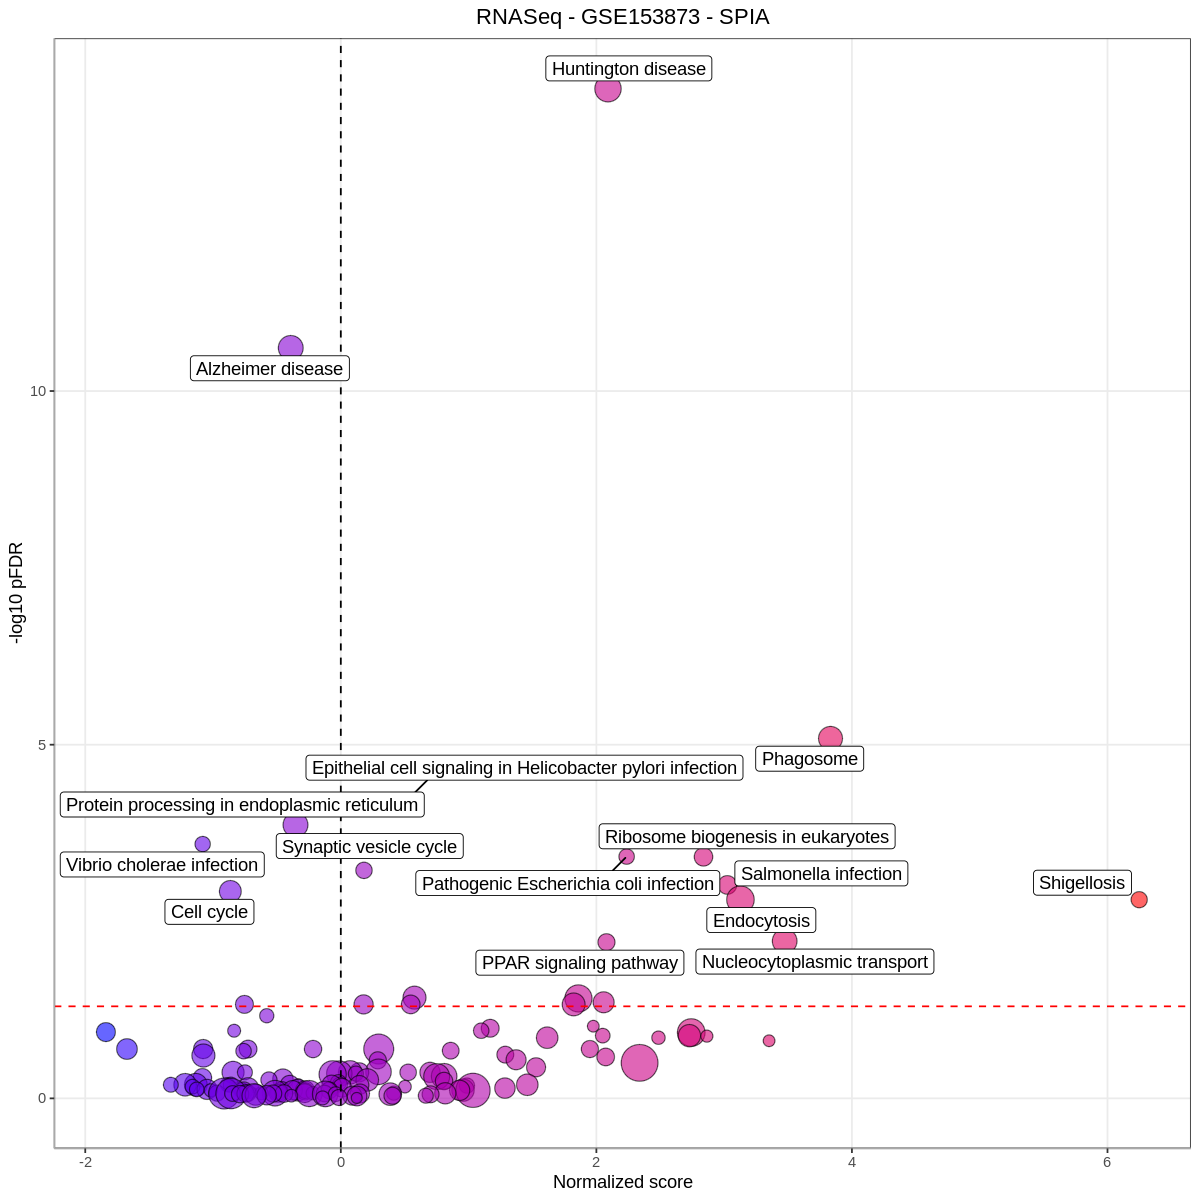

<!DOCTYPE html>
 
 
 RCyjs 
 
 
 
 
 
 
 
 Fit 
 Fit Selected 
 SFN 
 Hide Unselected 
 Show All 
 Layout: 
 
 
 breadthfirst 
 circle 
 cola 
 concentric 
 cose 
 cose-bilkent 
 dagre 
 grid 
 random

The plot is saved to /tmp/Rtmpw11pD0/file45ab30dd588f.html



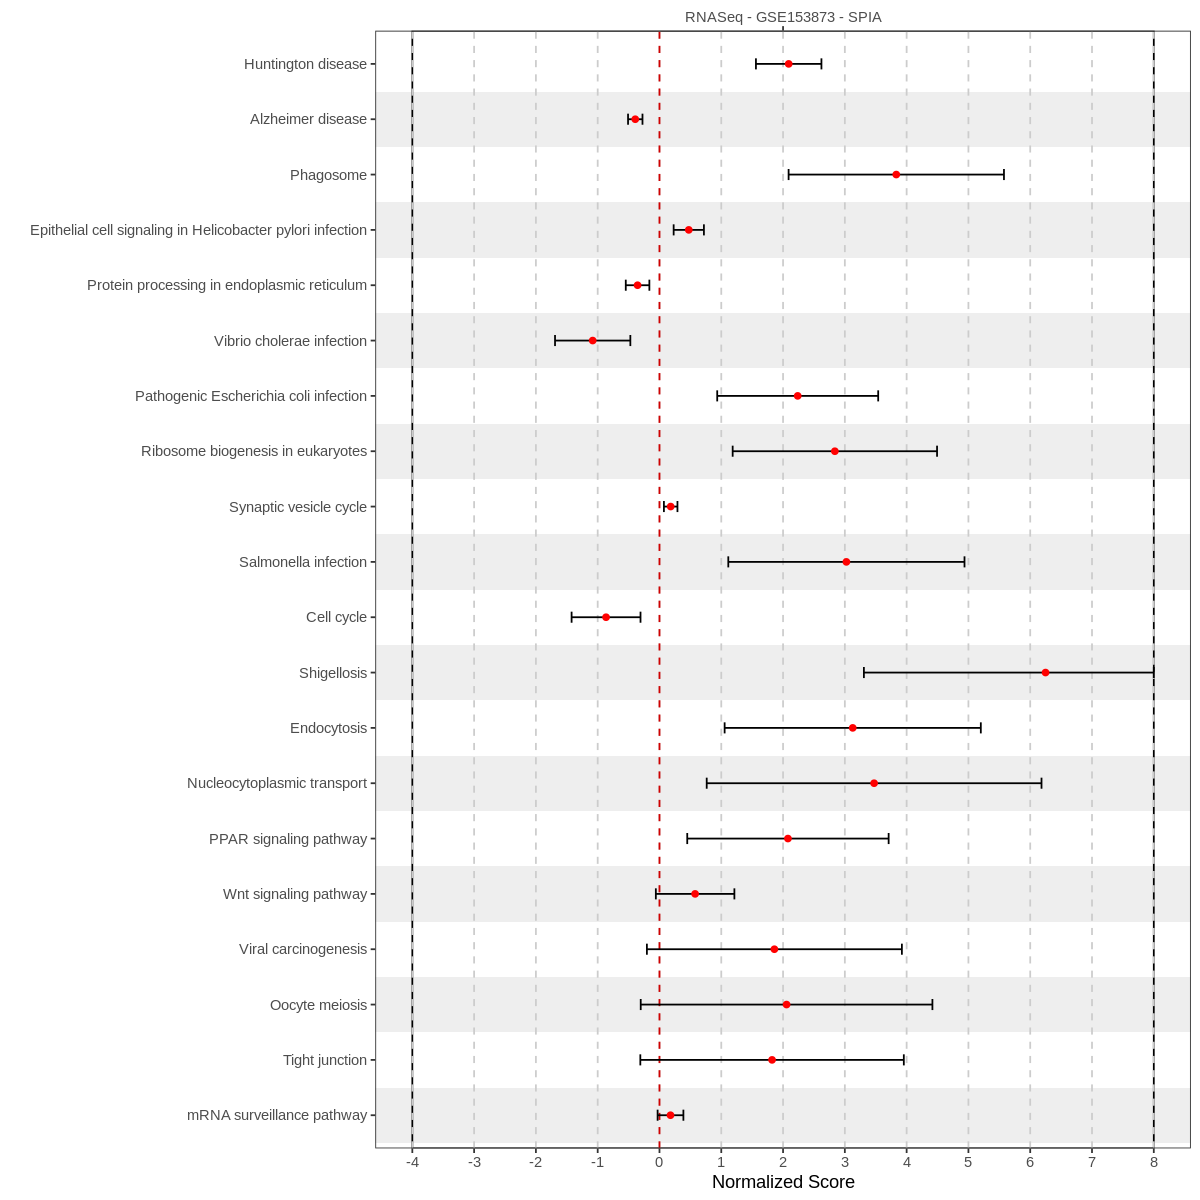

In [89]:
# Replace RNASeqSPIAResult with other results obtained from previous codes if needed
# Generate volcano plot for SPIA results
RCPA::plotVolcanoPathway(PAResult = RNASeqSPIAResult, topToLabel = 15) +
    ggplot2::ggtitle("RNASeq - GSE153873 - SPIA")

# Generate volcano plot for SPIA results
# Select top 20 pathways from the results
RNASeqSPIAToPlot <- list("RNASeq - GSE153873 - SPIA" = RNASeqSPIAResult[1:20,])
selectedPathways <- RNASeqSPIAResult$ID[1:20]
# Generate forest plot:
RCPA::plotForest(resultsList = RNASeqSPIAToPlot, yAxis = "name", statLims = c(-4, 8))

# Generate network graph of selected pathways
pltHtml <- RCPA::plotPathwayNetwork(
    PAResults = RNASeqSPIAToPlot,
    genesets = KEGGGenesets,
    selectedPathways = selectedPathways,
    statistic = "normalizedScore",
    mode = "continuous",
    edgeThreshold = 0.75
)

## **Basic Protocol 6: DATA INTEGRATION AND VISUALIZATION**

### **Gene-Level Meta-Analysis**

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'ggvenn'”


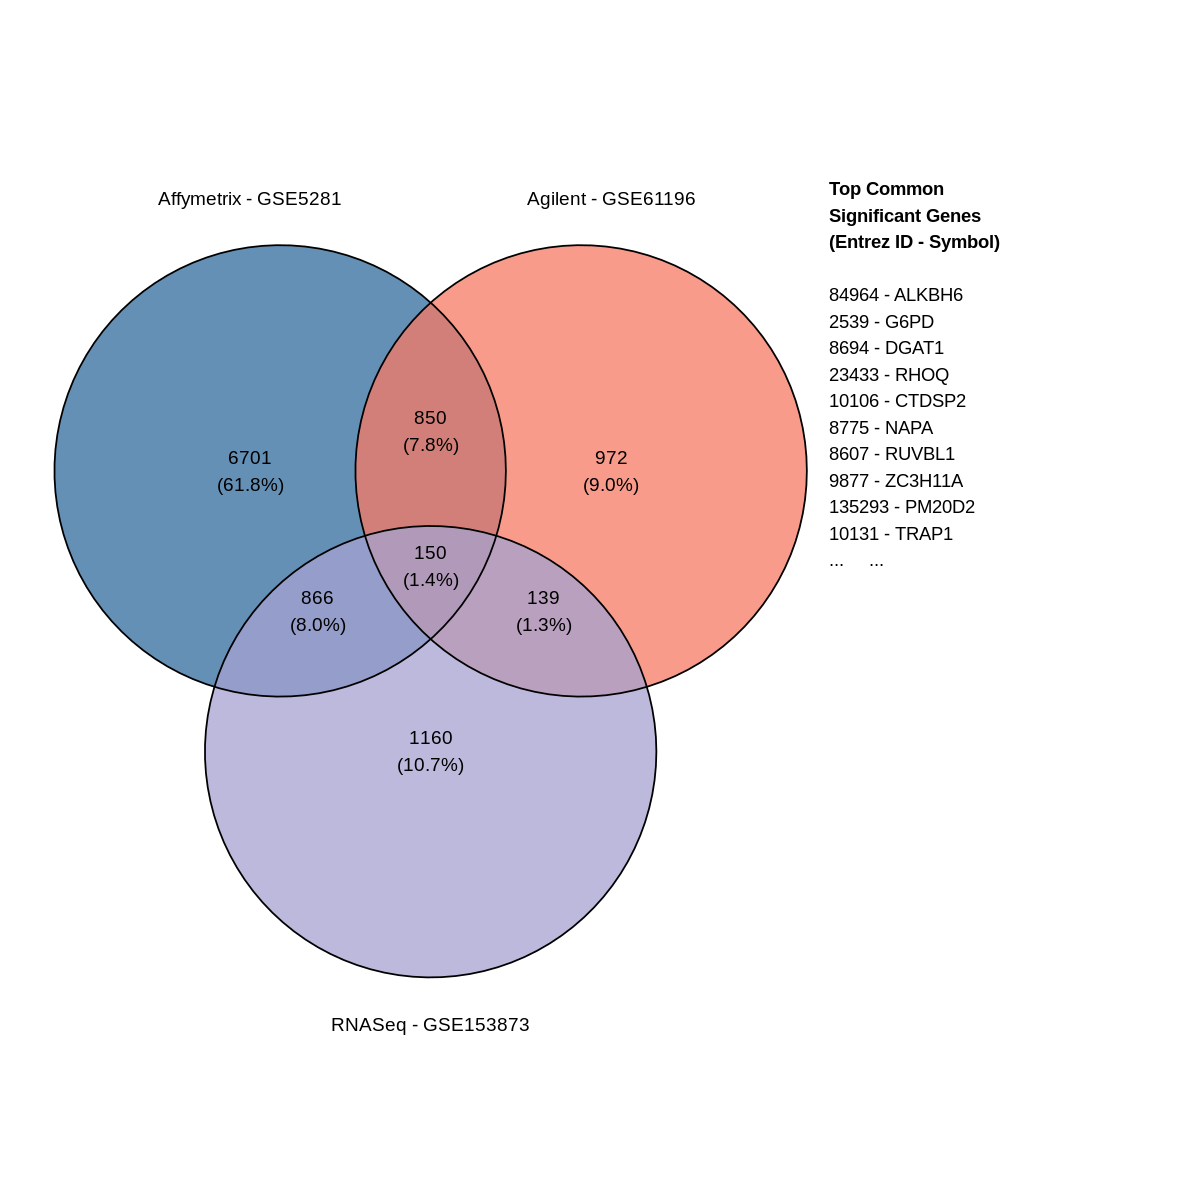

In [5]:
# Install required dependencies beforehand
BiocManager::install("ggvenn", update = F)

# DE analysis result from Affymetrix dataset:
affyDEExperiment <- RCPA::loadData("affyDEExperiment")
# DE analysis result from Agilent dataset:
agilDEExperiment <- RCPA::loadData("agilDEExperiment")
# DE analysis result from RNA-Seq dataset:
RNASeqDEExperiment <- RCPA::loadData("RNASeqDEExperiment")

# Extract the differential analysis result obtained from previous protocols
affyDEResults <- SummarizedExperiment::rowData(affyDEExperiment)
agilDEResults <- SummarizedExperiment::rowData(agilDEExperiment)
RNASeqDEResults <- SummarizedExperiment::rowData(RNASeqDEExperiment)

# Prepare the input list of DE results
DEResults <- list(
    "Affymetrix - GSE5281" = affyDEResults,
    "Agilent - GSE61196" = agilDEResults,
    "RNASeq - GSE153873" = RNASeqDEResults
)

# Generate a venn diagram plot
RCPA::plotVennDE(DEResults = DEResults, topToList = 10)

In [6]:

# Retrieve a list of common DE genes among multiple datasets
commonDEGenes <- RCPA::getCommonDEGenes(DEResults = DEResults)

# Display the commonDEGenes
commonDEGenes[1:5,]

ID    Symbol Description                       
1 84964 ALKBH6 alkB homolog 6                    
2 2539  G6PD   glucose-6-phosphate dehydrogenase 
3 8694  DGAT1  diacylglycerol O-acyltransferase 1
4 23433 RHOQ   ras homolog family member Q       
5 10106 CTDSP2 CTD small phosphatase 2

In [7]:
# Install required dependencies beforehand
BiocManager::install("meta", update = F)

# Perform meta-analysis using Stouffer’s method
metaDEResult <- RCPA::runDEMetaAnalysis(DEResults = DEResults, method = "stouffer")

# Display the result:
head(metaDEResult)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cloud.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'meta'”
Loading 'meta' package (version 6.5-0).
Type 'help(meta)' for a brief overview.
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'meta' package: https://tinyurl.com/dt4y5drs

Warning message:
“Fisher scoring algorithm may have gotten stuck at a local maximum.
Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message:
“Fisher scoring algorithm may have gotten stuck at a local maximum.
Setting tau^2 = 0. Check the profile likelihood plot with profile().”
Warning message:
“Fisher scoring algorithm may have gotten stuck at a local maximum.
S

ID    p.value      pFDR         logFC      logFCSE   
1 84964 1.541734e-19 2.585333e-15 -0.4693914 0.04721164
2 10106 6.840827e-16 4.219658e-12  0.3273123 0.03915734
3 7108  8.988938e-16 4.219658e-12 -0.3681265 0.04798479
4 4713  1.006538e-15 4.219658e-12 -0.5306827 0.06044290
5 10382 1.766204e-15 5.923497e-12 -0.6648832 0.07334485
6 396   2.202702e-15 6.156186e-12 -0.3427080 0.03925764

In [8]:
# Select top 20 most significant genes:
genesToPlot <- metaDEResult$ID[1:20]

# Get the full description of the genesToPlot:
genesAnnotation <- RCPA::getEntrezAnnotation(genesToPlot)
labels <- genesAnnotation[genesToPlot, "Description"]

# Create a list containing the results from individual analysis and meta analysis
affyDEResults <- SummarizedExperiment::rowData(affyDEExperiment)
agilDEResults <- SummarizedExperiment::rowData(agilDEExperiment)
RNASeqDEResults <- SummarizedExperiment::rowData(RNASeqDEExperiment)

resultsToPlot <- list(
    "Affymetrix - GSE5281" = affyDEResults,
    "Agilent - GSE61196" = agilDEResults,
    "RNASeq - GSE153873" = RNASeqDEResults,
    "Meta-analysis" = metaDEResult
)
# Generate gene heatmap
RCPA::plotDEGeneHeatmap(DEResults = resultsToPlot, 
                        genes = genesToPlot, labels = labels, 
                        negLog10pValueLims = c(0, 5), logFCLims = c(-1, 1))

[1] "ID"      "p.value" "pFDR"    "logFC"   "logFCSE"


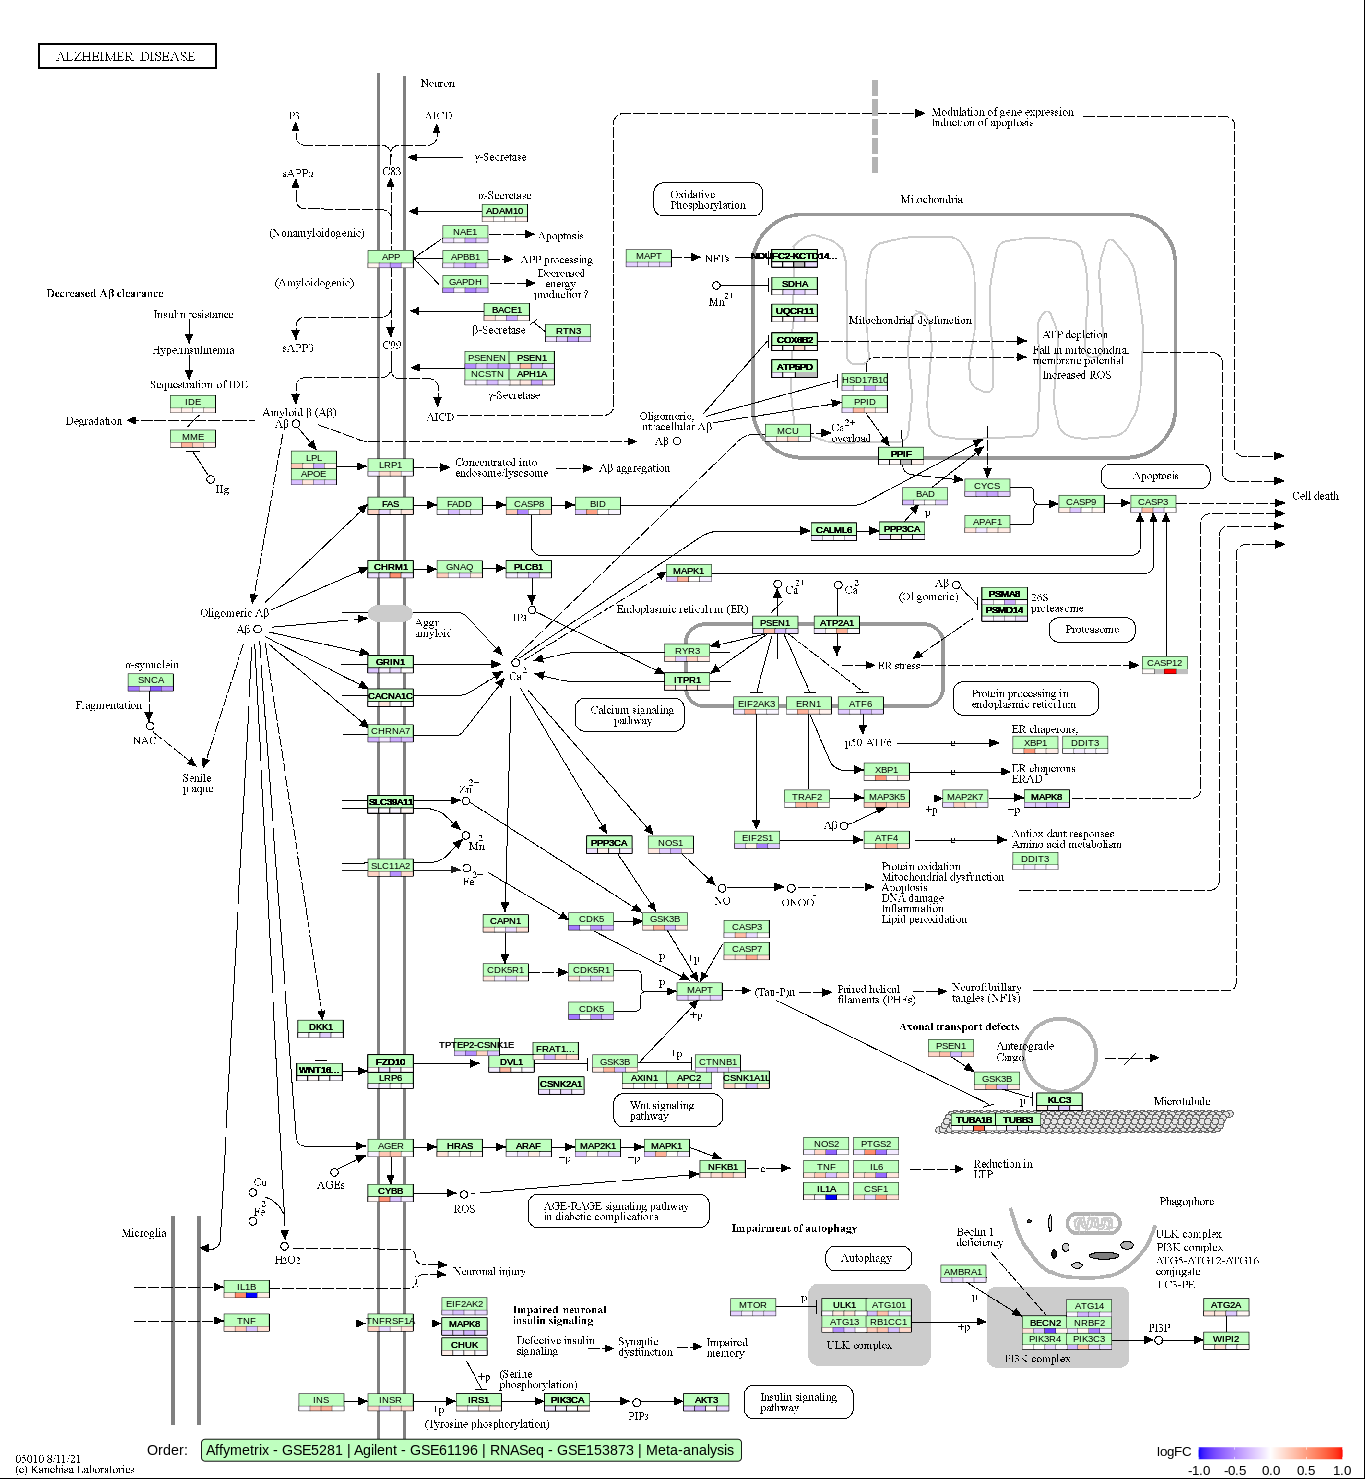

In [12]:
# Select columns in the results of differential analysis:
selectedColumns <- colnames(metaDEResult)
print(selectedColumns)

# Prepare the list for plotting
DEResultsToPlot <- list(
    "Affymetrix - GSE5281" = affyDEResults[, selectedColumns],
    "Agilent - GSE61196" = agilDEResults[, selectedColumns],
    "RNASeq - GSE153873" = RNASeqDEResults[, selectedColumns],
    "Meta-analysis" = metaDEResult
)
# Plot for KEGG Alzheimer’s Disease pathway
pltObj <- RCPA::plotKEGGMap(DEResults = DEResultsToPlot, 
                            KEGGPathwayID = "hsa05010", 
                            stat = "logFC", 
                            pThreshold = 1, statLimit = 1)

# This code is specific for Jupyter notebook environment to control the plot size
options(repr.plot.width = pltObj$width/250, repr.plot.height = pltObj$height/250)

# Display the plot
pltObj$plot

### **Pathway-Level Meta-Analysis**

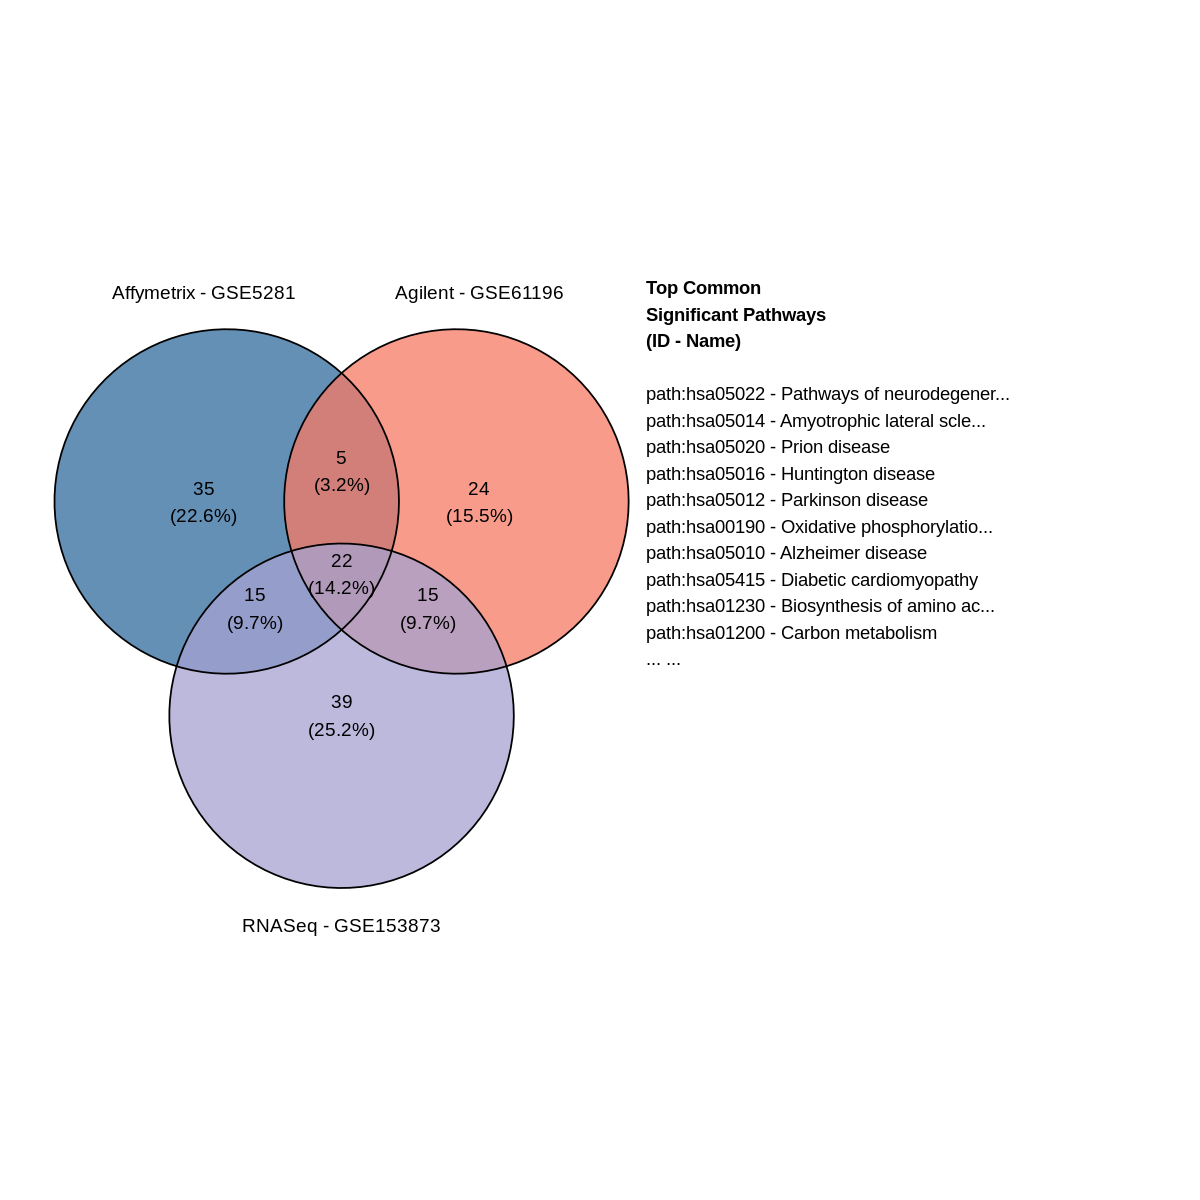

In [14]:
# FGSEA analysis result from Affymetrix dataset:
affyFGSEAResult <- RCPA::loadData("affyFGSEAResult")
# FGSEA analysis result from Agilent dataset:
agilFGSEAResult <- RCPA::loadData("agilFGSEAResult")
# FGSEA analysis result from RNA-Seq dataset:
RNASeqFGSEAResult <- RCPA::loadData("RNASeqFGSEAResult")

# # Load the KEGG gene sets
# KEGGGenesets <- RCPA::loadData("KEGGGenesets")

# Load the KEGG gene sets
KEGGGenesets <- RCPA::loadData("KEGGgenesets")

# Compile a list of pathway analysis results
PAResults <- list(
    "Affymetrix - GSE5281" = affyFGSEAResult,
    "Agilent - GSE61196" = agilFGSEAResult,
    "RNASeq - GSE153873" = RNASeqFGSEAResult
)

# This code is specific for Jupyter notebook environment to control the plot size
options(repr.plot.width = 10, repr.plot.height = 10)

# Plot venn diagram
RCPA::plotVennPathway(PAResults = PAResults, pThreshold = 0.05)

In [16]:

# Query a list of common pathways
commonPathways <- RCPA::getCommonPathways(PAResults = PAResults)

# Display the results:
commonPathways[1:5,]

ID            Name                                             
1 path:hsa05022 Pathways of neurodegeneration - multiple diseases
2 path:hsa05014 Amyotrophic lateral sclerosis                    
3 path:hsa05020 Prion disease                                    
4 path:hsa05016 Huntington disease                               
5 path:hsa05012 Parkinson disease

In [17]:
# Meta-analysis using Stouffer’s method
metaPAResult <- RCPA::runPathwayMetaAnalysis(PAResults = PAResults, method = "stouffer")

# Display the results:
metaPAResult[1:5, 1:5]

ID            name                          p.value      pFDR        
1 path:hsa05012 Parkinson disease             7.123092e-46 2.393359e-43
2 path:hsa05016 Huntington disease            3.763897e-44 6.323347e-42
3 path:hsa05014 Amyotrophic lateral sclerosis 9.552510e-44 1.069881e-41
4 path:hsa00190 Oxidative phosphorylation     6.473335e-40 5.437601e-38
5 path:hsa05020 Prion disease                 1.291475e-37 8.678712e-36
  score    
1 -2.467830
2 -2.430244
3 -2.393301
4 -2.691299
5 -2.402497

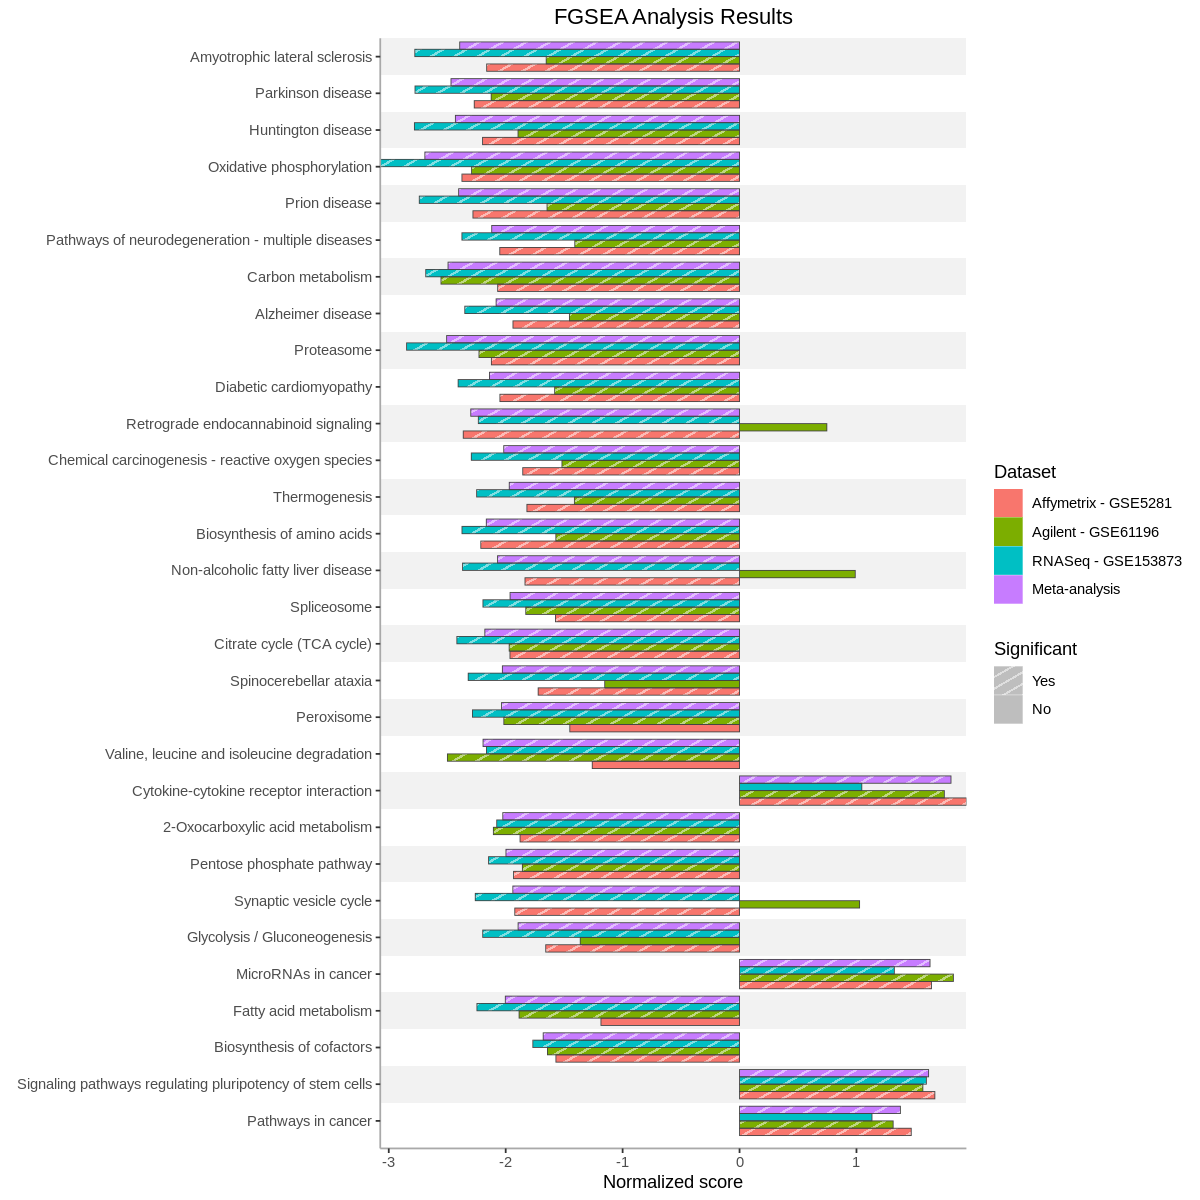

In [18]:
# Select top 30 significant from meta-analysis
selectedPathways <- metaPAResult$ID[1:30]
# Create a list of pathway analysis results of these 30 pathways
PAResultsToPlot <- list(
    "Affymetrix - GSE5281" = affyFGSEAResult,
    "Agilent - GSE61196" = agilFGSEAResult,
    "RNASeq - GSE153873" = RNASeqFGSEAResult,
    "Meta-analysis" = metaPAResult
)

# Plot bar chart
RCPA::plotBarChart(results = PAResultsToPlot, selectedPathways = selectedPathways) +
    ggplot2::ggtitle("FGSEA Analysis Results")

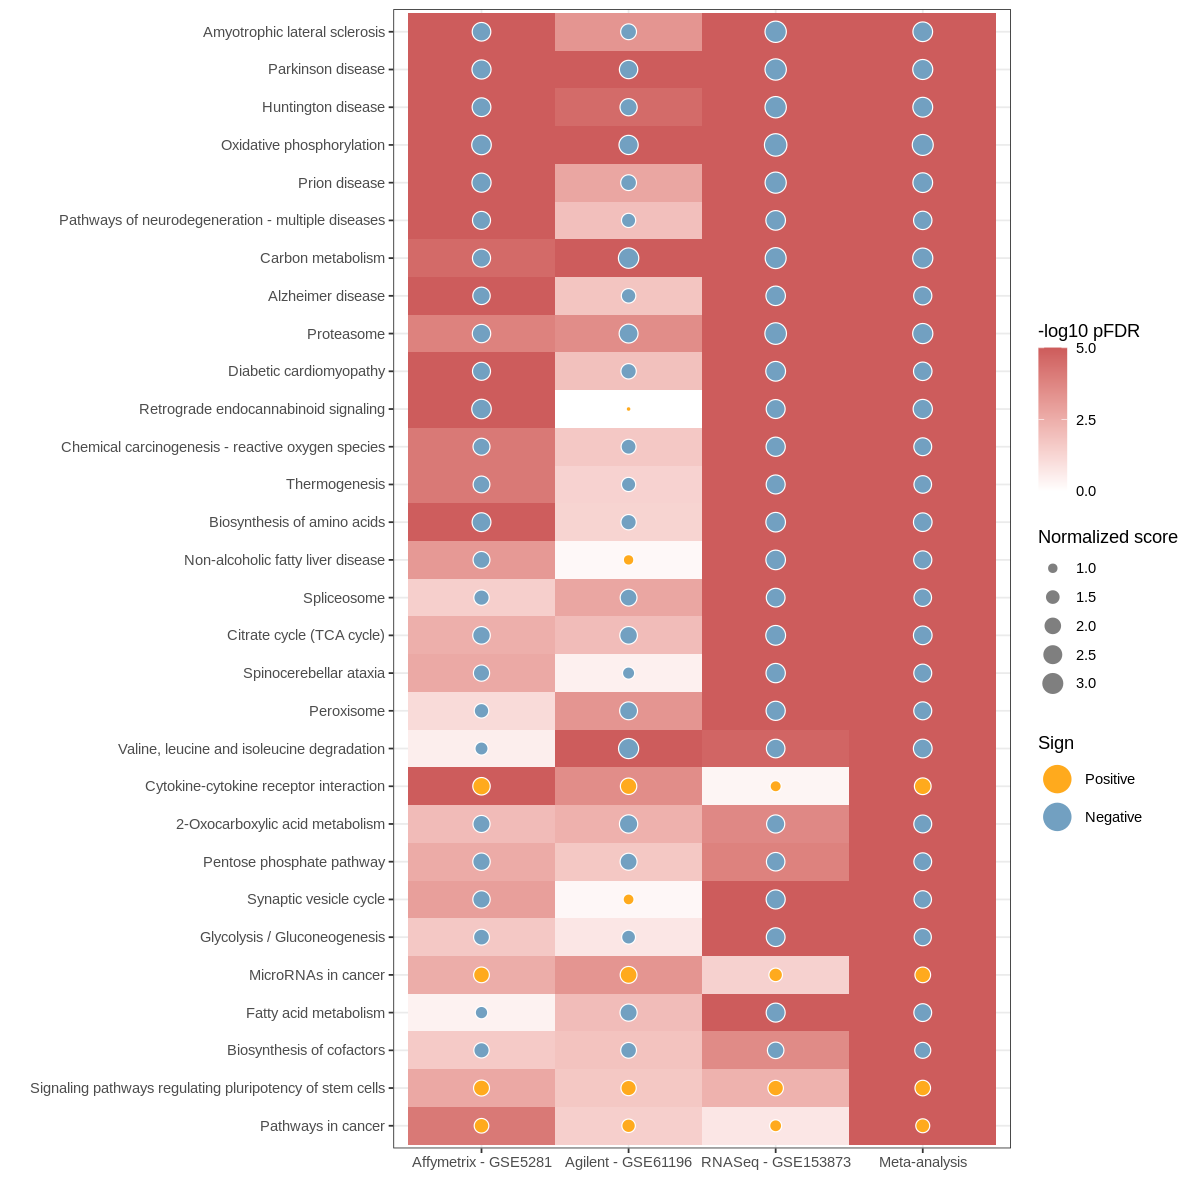

In [19]:

# Plot heat map
RCPA::plotPathwayHeatmap(resultsList = PAResultsToPlot, 
                        yAxis = "name", 
                        selectedPathways = selectedPathways)

In [20]:
# Select top 30 significant from meta-analysis
selectedPathways <- metaPAResult$ID[1:30]
# Create a list of pathway analysis results of these 30 pathways
allPAResultsToPlot <- list(
    "Affymetrix - GSE5281" = affyFGSEAResult,
    "Agilent - GSE61196" = agilFGSEAResult,
    "RNASeq - GSE153873" = RNASeqFGSEAResult,
    "Meta-analysis" = metaPAResult
)
# Plot pathway network
pltHtml <- RCPA::plotPathwayNetwork(
    PAResults = allPAResultsToPlot,
    genesets = KEGGGenesets,
    selectedPathways = selectedPathways,
    statistic = "normalizedScore",
    mode = "continuous",
    edgeThreshold = 0.75
)

<!DOCTYPE html>
 
 
 RCyjs 
 
 
 
 
 
 
 
 Fit 
 Fit Selected 
 SFN 
 Hide Unselected 
 Show All 
 Layout: 
 
 
 breadthfirst 
 circle 
 cola 
 concentric 
 cose 
 cose-bilkent 
 dagre 
 grid 
 random

The plot is saved to /tmp/RtmpLz1P9w/file52ff3a952be1.html




### **Pathway-Level Consensus Analysis**

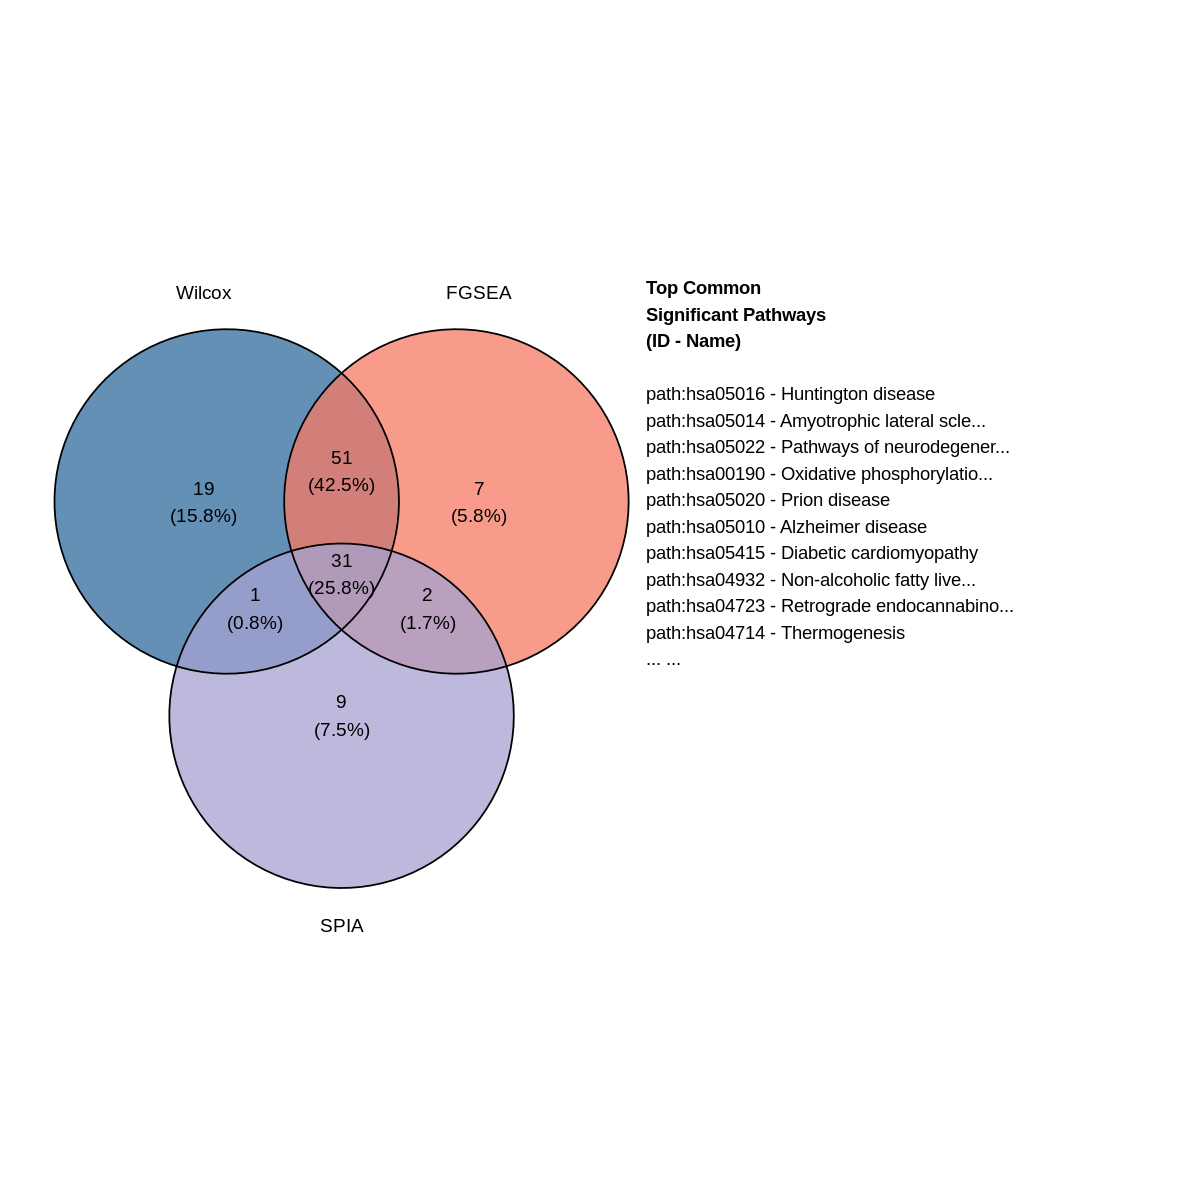

In [24]:
# Wilcoxon test results for RNA-Seq dataset:
RNASeqWilcoxResult <- RCPA::loadData("RNASeqWilcoxResult")
# FGSEA results for RNA-Seq dataset:
RNASeqFGSEAResult <- RCPA::loadData("RNASeqFGSEAResult")
# SPIA results for RNA-Seq dataset:
RNASeqSPIAResult <- RCPA::loadData("RNASeqSPIAResult")
# Load the KEGG gene sets
KEGGGenesets <- RCPA::loadData("KEGGGenesets")

# Prepare a list of results obtained from Wilcox test, FGSEA, and SPIA
selectedRNASeqPAResults <- list(
    "Wilcox" = RNASeqWilcoxResult,
    "FGSEA" = RNASeqFGSEAResult,
    "SPIA" = RNASeqSPIAResult
)

# Plot Venn diagram
RCPA::plotVennPathway(PAResults= selectedRNASeqPAResults, pThreshold = 0.05)

In [25]:
# Query a list of common pathways from Wilcox Test, FGSEA, SPIA:
commonPathways <- RCPA::getCommonPathways(PAResults = selectedRNASeqPAResults)
# Display the result
commonPathways[1:5,]

ID            Name                                             
1 path:hsa05016 Huntington disease                               
2 path:hsa05014 Amyotrophic lateral sclerosis                    
3 path:hsa05022 Pathways of neurodegeneration - multiple diseases
4 path:hsa00190 Oxidative phosphorylation                        
5 path:hsa05020 Prion disease

In [26]:
# Set seed to create reproducible result:
set.seed(1)

# Run consensus analysis using weightedZMean:
consensusWZRNASeqPAResult <- RCPA::runConsensusAnalysis(PAResults = selectedRNASeqPAResults, 
                                                        method = "weightedZMean")

# Display the result
consensusWZRNASeqPAResult[1:6, c("ID", "p.value", "pFDR", "name")]

# Run consensus analysis using RRA
consensusRRARNASeqPAResult <- RCPA::runConsensusAnalysis(PAResults = selectedRNASeqPAResults, 
                                                        method = "RRA", rank.by = "both")

# Display the result
consensusRRARNASeqPAResult[1:5, c("ID", "p.value", "pFDR", "name")]

ID            p.value      pFDR        
1 path:hsa05014 1.264478e-30 1.264478e-30
2 path:hsa05016 1.561395e-30 1.561395e-30
3 path:hsa00190 5.536432e-25 5.536432e-25
4 path:hsa05022 8.121946e-25 8.121946e-25
5 path:hsa05020 1.342091e-24 1.342091e-24
6 path:hsa05010 1.356958e-21 1.356958e-21
  name                                             
1 Amyotrophic lateral sclerosis                    
2 Huntington disease                               
3 Oxidative phosphorylation                        
4 Pathways of neurodegeneration - multiple diseases
5 Prion disease                                    
6 Alzheimer disease

ID            p.value      pFDR      
1 path:hsa00190 4.888366e-05 0.01735370
2 path:hsa00650 2.746605e-04 0.04875223
3 path:hsa00280 1.319859e-03 0.15618330
4 path:hsa03050 4.501857e-03 0.37852966
5 path:hsa00010 5.331404e-03 0.37852966
  name                                      
1 Oxidative phosphorylation                 
2 Butanoate metabolism                      
3 Valine, leucine and isoleucine degradation
4 Proteasome                                
5 Glycolysis / Gluconeogenesis

In [27]:
# Generate pathway network for consensus analysis:
# Create a list of results to plot:
selectedCCRNASeqPAResults <- list(
    "Wilcox" = RNASeqWilcoxResult,
    "FGSEA" = RNASeqFGSEAResult,
    "SPIA" = RNASeqSPIAResult,
    "Consensus - weightedZMean" = consensusWZRNASeqPAResult
)

# Select to plot top 30 most significant pathways
# from consensus analysis using weightedZMean:
selectedPathways <- consensusWZRNASeqPAResult$ID[1:30]

# Plot pathway network
pltHtml <- RCPA::plotPathwayNetwork(
    PAResults = selectedCCRNASeqPAResults,
    genesets = KEGGGenesets,
    selectedPathways = selectedPathways,
    statistic = "p.value",
    mode = "discrete",
    pThreshold = 0.05,
    edgeThreshold = 0.75
)

<!DOCTYPE html>
 
 
 RCyjs 
 
 
 
 
 
 
 
 Fit 
 Fit Selected 
 SFN 
 Hide Unselected 
 Show All 
 Layout: 
 
 
 breadthfirst 
 circle 
 cola 
 concentric 
 cose 
 cose-bilkent 
 dagre 
 grid 
 random

The plot is saved to /tmp/RtmpLz1P9w/file52ff3dd4059.html



***Perform consensus analysis of multiple methods and datasets:***

In [30]:
# Load the necessary data if users skipped the previous protocols
# Enrichment results using Wilcoxon test:
affyWilcoxResult <- RCPA::loadData("affyWilcoxResult")
RNASeqWilcoxResult <- RCPA::loadData("RNASeqWilcoxResult")
agilWilcoxResult <- RCPA::loadData("agilWilcoxResult")

# Enrichment results FGSEA:
affyFGSEAResult <- RCPA::loadData("affyFGSEAResult")
agilFGSEAResult <- RCPA::loadData("agilFGSEAResult")
RNASeqFGSEAResult <- RCPA::loadData("RNASeqFGSEAResult")

# TB analysis using SPIA:
affySPIAResult <- RCPA::loadData("affySPIAResult")
agilSPIAResult <- RCPA::loadData("agilSPIAResult")
RNASeqSPIAResult <- RCPA::loadData("RNASeqSPIAResult")

# Load the KEGG gene sets
KEGGGenesets <- RCPA::loadData("KEGGGenesets")

# Create a list of results from multiple pathway analysis methods on multiple datasets:
selectedPAResults <- list(
    "Affymetrix - Wilcox" = affyWilcoxResult,
    "Affymetrix - FGSEA" = affyFGSEAResult,
    "Affymetrix - SPIA" = affySPIAResult,
    "Agilent - Wilcox" = agilWilcoxResult,
    "Agilent - FGSEA" = agilFGSEAResult,
    "Agilent - SPIA" = agilSPIAResult,
    "RNASeq - Wilcox" = RNASeqWilcoxResult,
    "RNASeq - FGSEA" = RNASeqFGSEAResult,
    "RNASeq - SPIA" = RNASeqSPIAResult
)
# Run consensus analysis using weightedZMean on selectedPAResults:
consensusPAResult <- RCPA::runConsensusAnalysis(PAResults = selectedPAResults, 
                                                method = "weightedZMean")
                                                
# display the results
consensusPAResult[1:6, c("ID", "p.value", "pFDR", "name")]

ID            p.value      pFDR        
1 path:hsa05016 7.832335e-12 7.832335e-12
2 path:hsa05014 2.195423e-11 2.195423e-11
3 path:hsa05022 2.318851e-10 2.318851e-10
4 path:hsa00190 1.315072e-09 1.315072e-09
5 path:hsa05020 2.672101e-09 2.672101e-09
6 path:hsa05010 3.543817e-08 3.543817e-08
  name                                             
1 Huntington disease                               
2 Amyotrophic lateral sclerosis                    
3 Pathways of neurodegeneration - multiple diseases
4 Oxidative phosphorylation                        
5 Prion disease                                    
6 Alzheimer disease

In [31]:
# Select top 20 significant from consensus analysis
selectedPathways <- consensusPAResult$ID[1:20]
# Create a list of results to plot:
selectedPAResultsToPlot <- list(
    "Affymetrix - Wilcox" = affyWilcoxResult,
    "Affymetrix - FGSEA" = affyFGSEAResult,
    "Affymetrix - SPIA" = affySPIAResult,
    "Agilent - Wilcox" = agilWilcoxResult,
    "Agilent - FGSEA" = agilFGSEAResult,
    "Agilent - SPIA" = agilSPIAResult,
    "RNASeq - Wilcox" = RNASeqWilcoxResult,
    "RNASeq - FGSEA" = RNASeqFGSEAResult,
    "RNASeq - SPIA" = RNASeqSPIAResult,
    "Consensus Analaysis" = consensusPAResult
)
# Plot pathway network
pltHtml <- RCPA::plotPathwayNetwork(
    PAResults = selectedPAResultsToPlot,
    genesets = KEGGGenesets,
    selectedPathways = selectedPathways,
    statistic = "p.value",
    mode = "discrete",
    edgeThreshold = 0.75
)

<!DOCTYPE html>
 
 
 RCyjs 
 
 
 
 
 
 
 
 Fit 
 Fit Selected 
 SFN 
 Hide Unselected 
 Show All 
 Layout: 
 
 
 breadthfirst 
 circle 
 cola 
 concentric 
 cose 
 cose-bilkent 
 dagre 
 grid 
 random

The plot is saved to /tmp/RtmpLz1P9w/file52ff13f07bcb.html



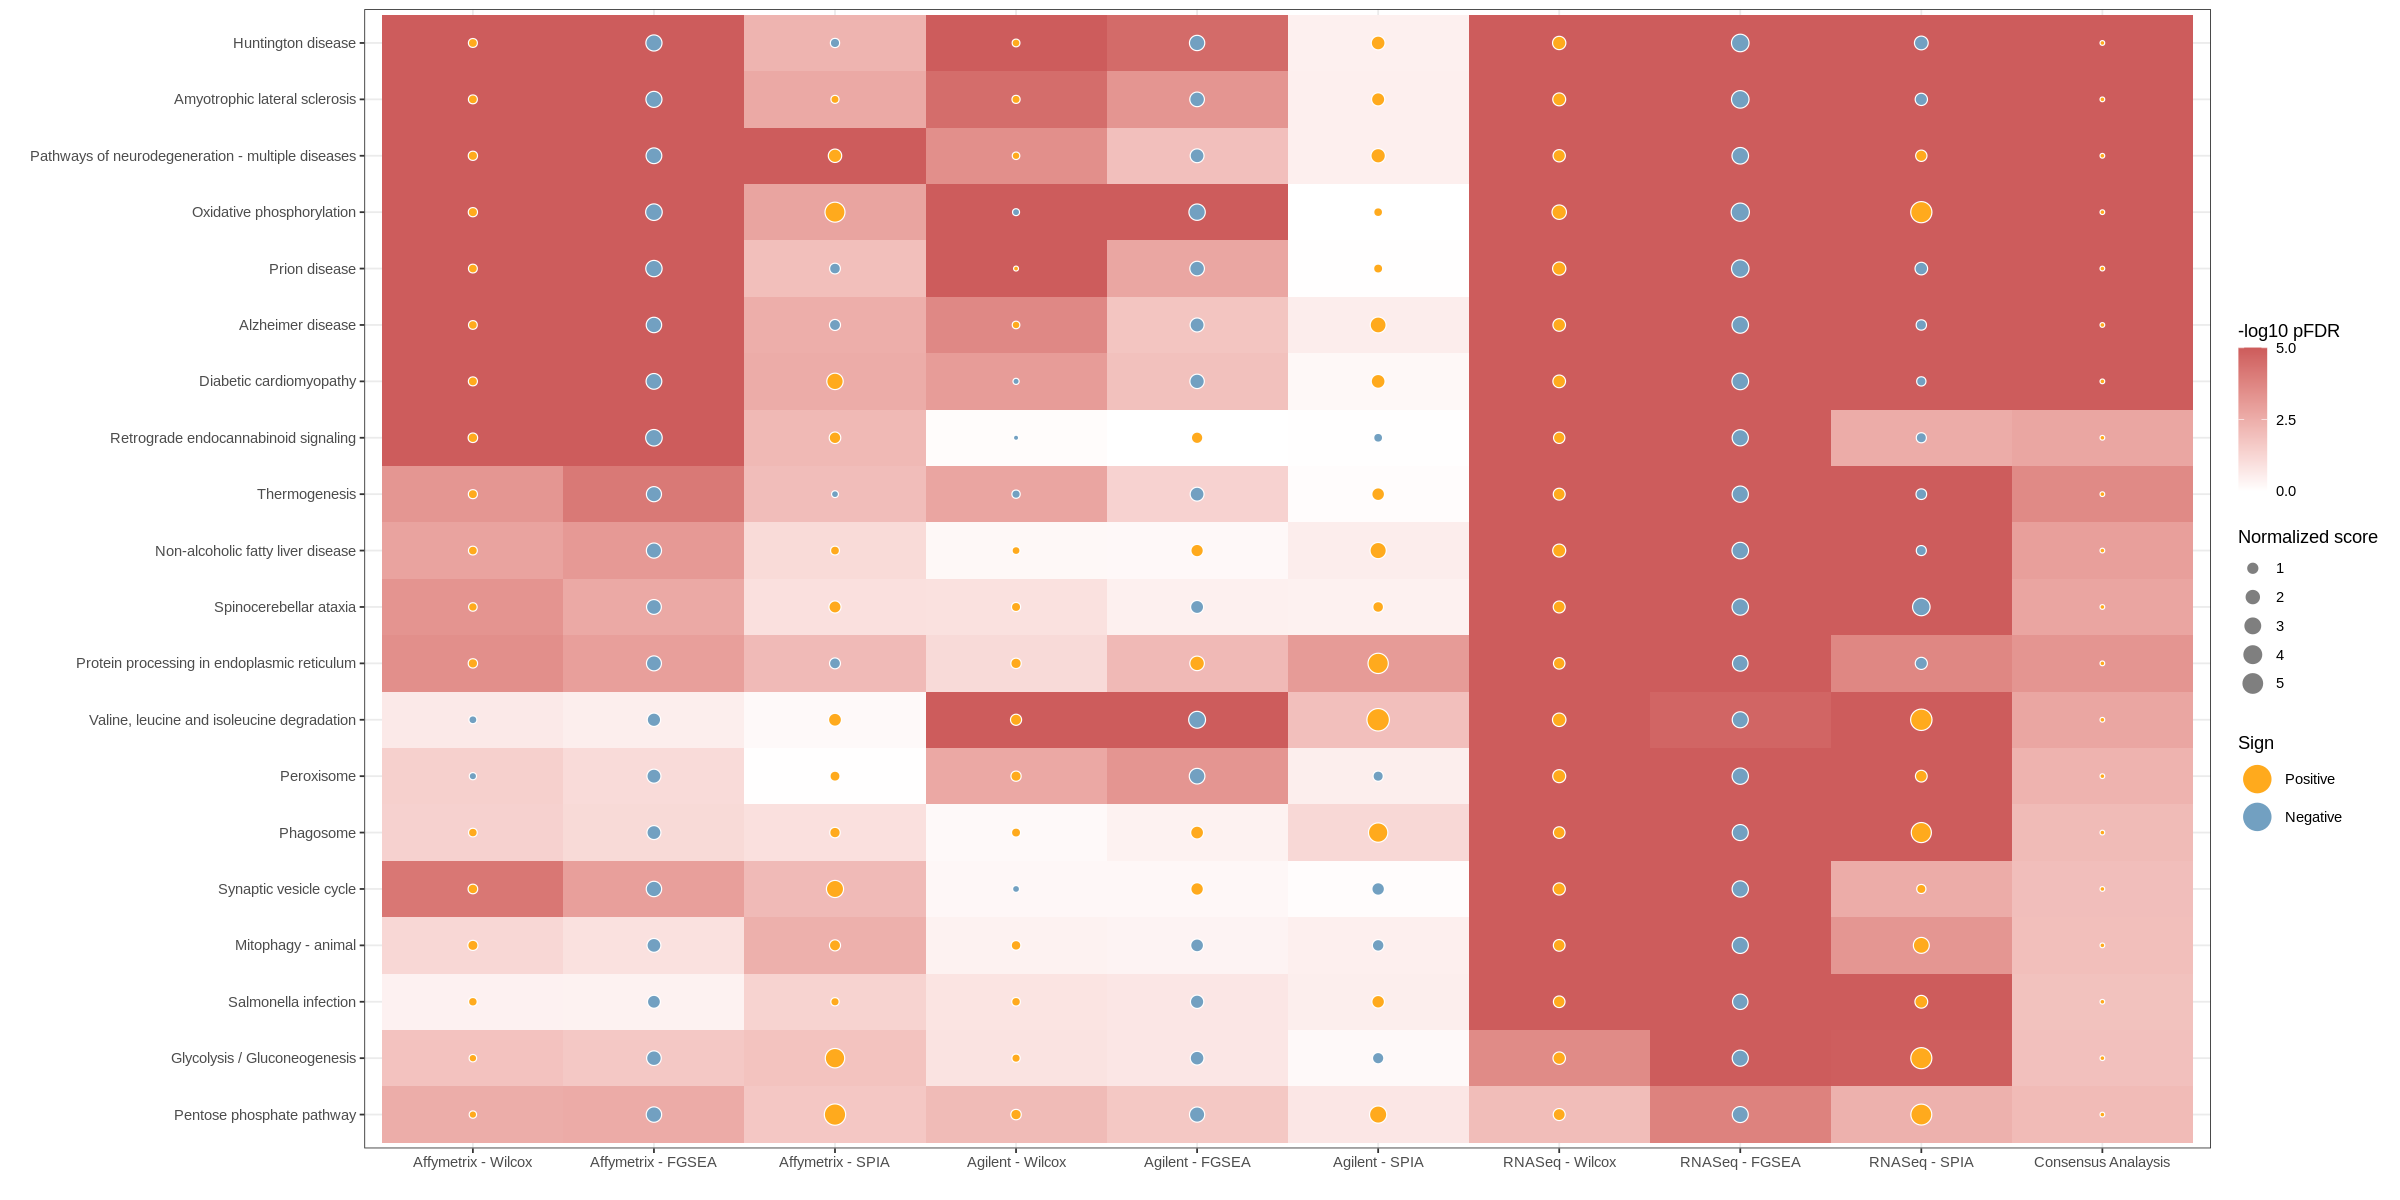

In [34]:
# This code is specific for Jupyter notebook environment to control the plot size
options(repr.plot.width = 20, repr.plot.height = 10)

RCPA::plotPathwayHeatmap(resultsList = selectedPAResultsToPlot, 
                        yAxis = "name", 
                        selectedPathways = selectedPathways)